# The Effects of Locational and Listing Characteristics on the Price of Airbnb Listings

# Table of Contents

- [Project 1](#Project-1)  
    - [1.1 Introduction](##Introduction)  
    - [1.2 Data Cleaning/Loading](##Data-Cleaning/Loading)  
    - [1.3 Summary Statistics Tables](##Summary-Statistics-Tables)  
    - [1.4 Plots, Histograms, Figures](##Plots,-Histograms,-Figures) 
- [Project 2](#Project-2)
    - [2.1 The Message](##The-Message)
    - [2.2 Maps and Interpetations](##Maps-and-Interpretations)  
- [Project 3](#Project-3)
    - [3.1 Potential Data to Scrape](##Potential-Data-to-Scrape)
    - [3.2 Potential Challenges](##Potential-Challenges)
    - [3.3 Scraping Data from a Website](##Scraping-Data-from-a-Website)
    - [3.4 Merging the Scraped Dataset](##Merging-the-Scraped-Dataset)
    - [3.5 Visualizing the Scraped Dataset](##Visualizing-the-Scraped-Dataset)
    - [3.6 Adding a New Dataset](##Adding-a-New-Dataset)
    - [3.7 Conclusion](##Conclusion)

# Project 1

## Introduction

The introduction of Airbnb to the housing market in 2007 was mere spectacular compared to what it has become in this present day. Airbnb helps aleviates the stress of finding housing when going on vacation or temporary visits to places and has since become a common thing to use to find good deals on housing when going out. However, where there are many people trying to help alleviate the stress coming from finding temporary housing, there are people that are trying to profitize it. Instead of Airbnb being a place where people help one another find places to live while they are temporarily away, it has become a profitizing market. People are incentivised to maximise their profits over helping out one another, by for example raising the minimun nights needed to spend at listings with higher prices. 

From this, I would like to study the relationship between how listing prices on Airbnb changes with respect to the characteristics featured on the listing. For example whether (the type of room, minimum nights stayed and the number of listings the host has on Airbnb) can affect the rental price. In analysing this relationship, we can learn more about the pricing stategies when it comes to listing a person's house on Airbnb. 

An important variable I am interested in looking into its relationship with price is distance from a City Centre. As an urban economist student, I am interested in the changes in rental prices listings as the distance from a City Centre increases. According to the Monocentric City Model, as we tend to move away from the supposed centre of a City, the rental prices of homes should decrease. But where is the Centre of New York City? For this project we will consider the centre of the City to be Times Square in Manhatten borough (as it is the most visited part of NYC) and measure the relationship with the price of listings as distance from the city centry increases.

We gathered our dataset from the data source provider, Kaggle, which provies a wide offering of datasets for data analysts. The dataset "New York City Airbnb Open Data" was chosen as it contains multiple variables on the characteristics of Airbnb Listings as well as locational data on these listings. Furthermore, we are interested in analysing whether crime can have an effect of the prices of these listings. This crime data was gathered from the New York City police Department and was successfully merged with our data.
DGOMONOV. (2024). [New York City Airbnb Open Data], [Version 3]. Retrieved [03/03/2023] from [https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data].


Our key findings indicated that prices do infact vary when exposed to these exogenous factors, however the relationship between

## Data Cleaning/Loading

We first start by loading the packages needed to explore the dataset. The dataset is then loaded into the notebook so that we can conduct an examination of the variables in the dataset that we would like to use to answer the 

In [121]:
# Import Libraries

import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import math
from shapely.geometry import Point
import geopandas as gpd
import folium
from folium.features import DivIcon
from folium.plugins import HeatMap
import warnings
import requests
from bs4 import BeautifulSoup
warnings.filterwarnings('ignore')

In [6]:
# Read in the Data and Save as a DataFrame under a variable "df" which we can call.

data = pd.read_csv("C:/Users/justi/Desktop/Uni/Year 3/semester 2/Eco 225/Data/AB_NYC_2019.csv")
raw_df = pd.DataFrame(data)

Now that we have loaded the dataset into the notebook, we should look at which variables we can use to answer our question.

In [7]:
# Create a Table with the Variables Names in the Data Set

pd.DataFrame({"Variable Names": raw_df.dtypes.index, "Type": raw_df.dtypes.values})

,Variable Names,Type
0,id,int64
1,name,object
2,host_id,int64
3,host_name,object
4,neighbourhood_group,object
5,neighbourhood,object
6,latitude,float64
7,longitude,float64
8,room_type,object
9,price,int64


From the table above, in answering the research question we would only need the variables price, neighbourhood_group, neighbourhood, latitude, longitude, room_type, minimum_nights, calculated_host_listings_count. We can also get the number of observations in the dataset shown below.

In [8]:
raw_df.shape[0] # returns n number of observations

48895

We can see that as of right now we have 48895 observations in the dataset, the value may drop after cleaning the dataset. Using this we can now construct some summary statistics to determine if there are any problematic observations in the data.

In [9]:
numerical_variables = ["price", "latitude", "longitude", 
                       "minimum_nights", "calculated_host_listings_count"]
rename_ = {"price" : "Price", "latitude" : "Latitude", 
       "longitude" : "Longitude", "number_of_reviews" : "Number of Reviews",
       "minimum_nights": "Minimum Nights", 
       "calculated_host_listings_count" : "Host Listings"}
raw_df[numerical_variables].describe().rename(columns = rename_).round(2)

,Price,Latitude,Longitude,Minimum Nights,Host Listings
count,48895.00,48895.00,48895.00,48895.00,48895.00
mean,152.72,40.73,-73.95,7.03,7.14
std,240.15,0.05,0.05,20.51,32.95
min,0.00,40.50,-74.24,1.00,1.00
25%,69.00,40.69,-73.98,1.00,1.00
50%,106.00,40.72,-73.96,3.00,1.00
75%,175.00,40.76,-73.94,5.00,2.00
max,10000.00,40.91,-73.71,1250.00,327.00


In the table above, we can see that each colunm selected does not contain any missing values. No missing values means that we would not need to use the methods of deletion and imputation to solve the missing value problem. 

However, there are some potentially proplematic observations in the raw data gathered from Kaggle. One of these issues would be the variable "minimum_nights", where there seems to be some observations where guests have to stay for a minimun of 1250 days (3 and 1/2 years). We consider these points to be outliers which can be due to measurement errors/data entry or processing errors as no one could be possily be staying for that long. Since we do not know the actual intentions of the host's we should restrict the minimun nights stayed to be at most 365 days (1 year) and remove the observations which are greater than 365 days. 

We also see that the minimun price of renting for one day is 0 dollars, which can be human error in listing the home at that price or just a host being very kind, either way these observations would also have to be removed as we cannot determine the actual observation. Following that, there also are some observations of rent prices being 10000 dollars which is well above the standard deviation range of 240.15 dollars. These extreme outliers would have to be removed as there are not enough observations with such high figures to base an economical analysis. Thus we restrict the daily rental price of AirBnB listings to be below 1000 dollars and remove the observations greater than that.

In [10]:
string_variables = ["neighbourhood_group", "neighbourhood", "room_type"]
rename_ = {"neighbourhood_group" : "Neighbourhood Group", "neighbourhood" : "Neighbourhood", 
       "room_type" : "Room Type"}
raw_df[string_variables].rename(columns = rename_).describe()

,Neighbourhood Group,Neighbourhood,Room Type
count,48895,48895,48895
unique,5,221,3
top,Manhattan,Williamsburg,Entire home/apt
freq,21661,3920,25409


The table above summarises the selected categorical variables in the dataset. We can see that the number of observations are the same for each categorical variable and the numerical variables. This means that there are no missing values in the dataset which we would need to imput or remove. We can also see that there are 221 unique neighbourhoods found in the data set with the most observations coming from the neighbourhood Williamsburg. Also we see that Manhattan is the neighbourhood group which contains the most AirBnB listings and the most common listing is where the host lists the entire home/apartment out. We do not observe any problematic observations in the categorical variables, so we move onto the data filtering process.

In [11]:
variables = ["price", "latitude", "longitude", 
            "minimum_nights", "calculated_host_listings_count",
            "neighbourhood_group", "neighbourhood", "room_type"]

filt = (raw_df["minimum_nights"] <= 365)
clean_df = raw_df[filt][variables]

filt = (clean_df["price"] > 0)
clean_df = clean_df[filt][variables]

filt = (clean_df["price"] <= 1000)
clean_df = clean_df[filt][variables]

We are interested in how the distance from being near to a centre of a city can affect the price of the rental. Thus we explore this by using the Harvsine function (which determines the circle distance between two points on a sphere given their longitudes and latitudes) to generate an estimated distance between two pairs of longitudinal and latitudinal points. One of the pairs would be the coordinates of an AirBnB listing and the other would be the coordinates of Times Square in NYC.

In [12]:
def calculate_distance(lat1: float, lon1: float,
                       lat2: float, lon2: float) -> float:
    """Returns the distance (km) between the two locations defined by(lat1, lon1) 
    and (lat2, lon2), rounded to the nearest meter.
    """
    # This function uses the haversine function to find the distance between two locations.
    # convert decimal degrees to radians
    # this is only an approximation not an actual measurement in reality, the earth is 
    # not completely spherical
    lon1, lat1, lon2, lat2 = (math.radians(lon1), math.radians(lat1),
                              math.radians(lon2), math.radians(lat2))

    # Calculate the distance using the haversine formula t
    lon_diff = lon2 - lon1
    lat_diff = lat2 - lat1
    a = (math.sin(lat_diff / 2) ** 2
         + math.cos(lat1) * math.cos(lat2) * math.sin(lon_diff / 2) ** 2)
    c = 2 * math.asin(math.sqrt(a))

    return round(c * 6371, 3) # 6371 is the Earth's Radius

We then apply this function onto out dataset to generate the distances of each listing from Times Square in Manhatten shown below.

In [13]:
Dist_to_Square = []
lat = clean_df["latitude"].to_list()
lon = clean_df["longitude"].to_list()
gps = zip(lat,lon)
for i in list(gps):
    dis = calculate_distance(i[0], i[1], 40.758896, -73.985130)
    Dist_to_Square.append(dis)
clean_df["Distance to Times Square"] = Dist_to_Square

We are interested in wondering if the type of listing can affect the price, this observation is given in the "room_type" variable in the dataset. Since we would like to run a regression with a categorical variable, we would need to convert them into a dummy variable before a regression analysis can be done, this is shown in the process below: 

In [14]:
clean_df["entire"] = np.where(clean_df["room_type"] == "Entire home/apt", 1, 0)
clean_df["private"] = np.where(clean_df["room_type"] == "Private room", 1, 0)
clean_df["shared"] = np.where(clean_df["room_type"] == "Shared room", 1, 0)

Since we have finished cleaning the data, we can now start constructing statistical summaries on both our predictors and dependent variables. We start by selecting the variables that we are interested in after the cleaning has been done.

In [15]:
variables = ["price", "minimum_nights", "Distance to Times Square", 
             "calculated_host_listings_count", "entire", "private", 
             "shared", "neighbourhood_group", "neighbourhood", "room_type", "latitude", "longitude"]

final_df = clean_df.copy()[filt][variables]

## Summary Statistics Tables

In [16]:
numerical_variables = final_df.select_dtypes(["number"]).columns

rename_ = {"price" : "Price", "minimum_nights": "Minimum Nights", 
           "calculated_host_listings_count" : "Host Listings"}

table = final_df[numerical_variables].iloc[:, [0,1,2,3]]
table.rename(columns = rename_).describe().round(3)

,Price,Minimum Nights,Distance to Times Square,Host Listings
count,48631.000,48631.000,48631.000,48631.000
mean,141.313,6.783,7.146,7.164
std,116.737,16.123,4.444,33.031
min,10.000,1.000,0.032,1.000
25%,69.000,1.000,3.874,1.000
50%,105.000,3.000,6.422,1.000
75%,175.000,5.000,9.473,2.000
max,1000.000,365.000,35.997,327.000


We can see that the number of observations have went down after the cleaning process, however, all the variables seem to have the same number of observations. In the table summary above we can see that for our numerical predictor variables, the average price per rental on AirBnB is 141.313 dollars. The maximum value of a listing price has been reduced to 1000 dollars and the minimum nights have also been reduced to observations below 365 days. We can see that on average listings seem to be 7 kilometers away from Times Square. Considering that a flight from Brooklyn to The Bronx covers a distance of 32 kilometers, we have reason to believe that the majority of the listings are found in the city of Manhatten.

In [17]:
entire_obs = sum(final_df["entire"] == 1)
private_obs = sum(final_df["private"] == 1)
shared_obs = sum(final_df["shared"] == 1)
tab = pd.DataFrame({" " : ["Observations"], 
                    "Entire" : [entire_obs], 
                    "Private" : [private_obs], 
                    "Shared" : [shared_obs],
                   "Total" : [final_df["entire"].count()]})
tab.set_index(" ")

,Entire,Private,Shared,Total
,,,,
Observations,25207,22269,1155,48631


From the sumamry table from above we can see that there are a total of 25207 listings of entire homes/apartments, 22269 private rooms and 1155 shared rooms on AirBnB. The total of these amounts is equal to the number of observations seen the in the dataset which helps in the case of no missing values.

In [18]:
categorical_variables = final_df.select_dtypes(["object"]).columns

rename_ = {"neighbourhood_group" : "Neighbourhood Group", "neighbourhood" : "Neighbourhood", 
       "room_type" : "Room Type"}
final_df[categorical_variables].rename(columns = rename_).describe()

,Neighbourhood Group,Neighbourhood,Room Type
count,48631,48631,48631
unique,5,221,3
top,Manhattan,Williamsburg,Entire home/apt
freq,21482,3908,25207


We can see that the categorical summary is relatively unchanged with the same number of unique variables in the each variable (Neighbourhood Group, Neighbourhood and Room Type). The only thing that has changed since the cleaning process is the number of observations has been reduced.

## Plots, Histograms, Figures

In [19]:
plt.rcParams.update({'font.size': 10})

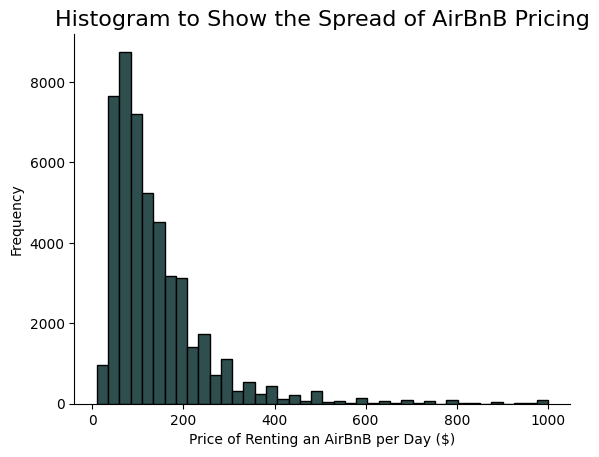

In [20]:
fig, ax = plt.subplots()

final_df["price"].plot(kind = "hist", 
                       y = "frequency", color = "darkslategray", 
                       edgecolor = "black", bins = 40, ax = ax)

for side in ["right", "top"]:
    ax.spines[side].set_visible(False)
ax.set_xlabel("Price of Renting an AirBnB per Day ($)")
plt.title("Histogram to Show the Spread of AirBnB Pricing", fontsize = 16);

From the histogram above we can see that even after the cleaning process, the price of renting a AirBnB per day is still skewed to the right with most of the values lying at the price of 150 dollars. This can have an effect on our regression model since the normality does not seem to hold within the data. Have we not removed the observations greater than 1000, it would have skewed the graph even more to the right and would have made it harder to interpret. 

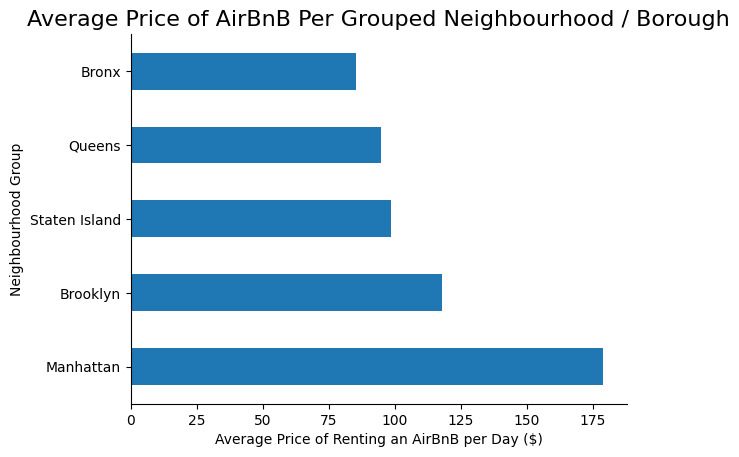

In [21]:
barc = final_df.groupby("neighbourhood_group")["price"].mean().sort_values(ascending = False)

fig, ax = plt.subplots()

for side in ["right", "top"]:
    ax.spines[side].set_visible(False)

barc.plot(kind = "barh", y = "values", ax = ax, color = "tab:blue")
ax.set_ylabel("Neighbourhood Group")
ax.set_xlabel("Average Price of Renting an AirBnB per Day ($)")
plt.title("Average Price of AirBnB Per Grouped Neighbourhood / Borough", fontsize = 16);

Grouping the prices by Neighbourhood Group and finding the average price of a listing in each borough, we can see that Manhatten has the highest prices out of the boroughs. This can be due to the fact that Manhatten is the most visited place in the city, thus many Airbnb listings would be made in that area from the inlow and outflow of turists regularly. We can see that The Bronx is the lowest in the chart with an average price of rent by Airbnb being 87.5 dollars compared to 177 dollars in Manhattan. This means that there are significant differences pricing levels seen between the borough groups in the data. The Bronx is considered to be Nyc lowest income borough which can explain why it is the lowest on the chart.Going forward, we would need to take into account for these differences seen in the clusters(Neighbourhood Groups).

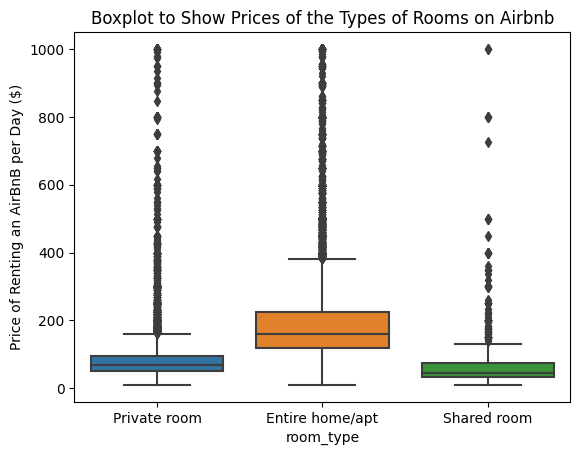

In [22]:

fig, ax = plt.subplots()
# boxplot
ax.set_title("Boxplot to Show Prices of the Types of Rooms on Airbnb")
sns.boxplot(data = final_df, x="room_type", y="price", ax=ax)
ax.set_ylabel("Price of Renting an AirBnB per Day ($)")

plt.show()

From the Boxplot shown above, we get a sense on the problem of the large outliers seen in the price of renting an AirBnB per day. We can see that the rental price of entire homes or apartments is higher than that of private or shared rooms with a median opf approcimately 180 dollars. Comparing private room and shared room listings, we can see that the price for both categories are relatively the same with the median of shared room listings being lower by a bit. Going forward the large outliers should be addressed more indepthly before a regression analysis can be conducted.

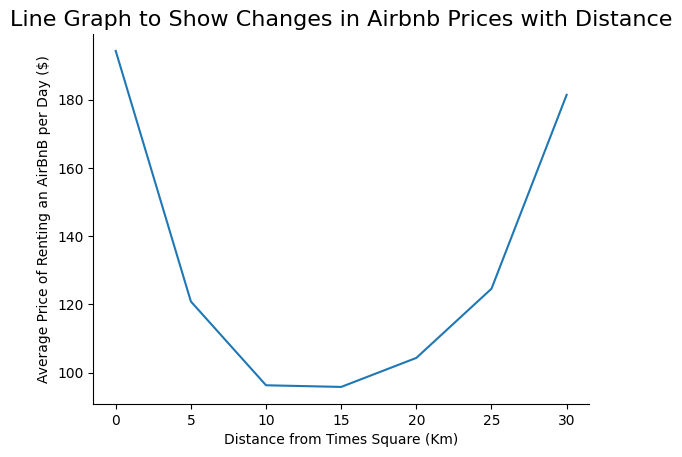

In [604]:
fig, ax = plt.subplots()

graph = final_df.copy()
graph["Distance Rounded"] = graph["Distance to Times Square"].round(0)
graph.loc[graph["Distance to Times Square"] <= 36, "Distance Grouped"] = 30
graph.loc[graph["Distance to Times Square"] <= 30, "Distance Grouped"] = 25
graph.loc[graph["Distance to Times Square"] <= 25, "Distance Grouped"] = 20
graph.loc[graph["Distance to Times Square"] <= 20, "Distance Grouped"] = 15
graph.loc[graph["Distance to Times Square"] <= 15, "Distance Grouped"] = 10
graph.loc[graph["Distance to Times Square"] <= 10, "Distance Grouped"] = 5
graph.loc[graph["Distance to Times Square"] <= 5, "Distance Grouped"] = 0
graph = graph.groupby("Distance Grouped")[["price"]].mean()
graph.plot(ax=ax, legend=False, linestyle="solid")
for side in ["right", "top"]:
    ax.spines[side].set_visible(False)
ax.set_ylabel("Average Price of Renting an AirBnB per Day ($)")
ax.set_xlabel("Distance from Times Square (Km)")
plt.title('Line Graph to Show Changes in Airbnb Prices with Distance', fontsize = 16);

We generated the "Distance from Times Square" variable to test out theory about if rent prices would fall as the distance from the centre of a city increases given by a monocentric city model. From the diagram above we can see that when we grouped listings together (from 0-5 km to "Times Square", 6-10 km to "Times Square" etc.) and found the average distance from our supposed city centre "Times Square", the rental price initially falls and then rises. This is contradictory to the monocentric model discussed as rental prices seem to increase after 15 km from Times Square. 

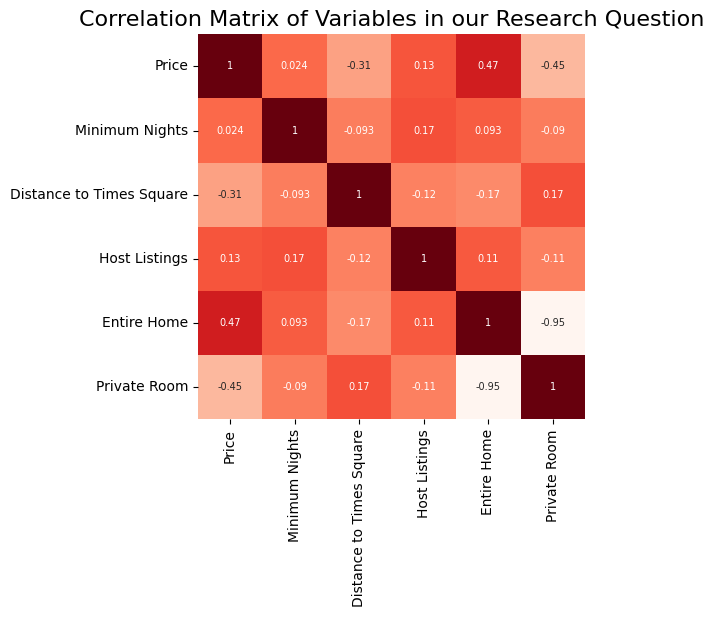

In [117]:
rename_ = {"price" : "Price", "minimum_nights": "Minimum Nights", 
           "calculated_host_listings_count" : "Host Listings",
           "neighbourhood_group" : "Neighbourhood Group", 
           "neighbourhood" : "Neighbourhood", 
           "room_type" : "Room Type", "entire" : "Entire Home", 
           "private" : "Private Room", "shared" : "Shared Room"}

num = final_df[numerical_variables].rename(columns = rename_)

corr = num.iloc[:,:6].corr()
plt.figure(figsize=(5, 5))
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
sns.heatmap(corr, annot=True, cbar = False, annot_kws = {'size' : 7}, cmap='Reds')
plt.title("Correlation Matrix of Variables in our Research Question", fontsize = 16);

Creating a Correlation matrix for our variables used for our research question, overall, the correlation between the predictor variables and the dependent variable "Price" seem weak. We can see that some variables like "Distance to Times Square" and "Private Room" are slightly negatively correlated to price while "Minimum Nights", "Host Listings" and "Shared Room" are weakly positively correlated with "Price". We can even argue that the correlation of these predictor variables to the dependent variable is close to zero. The variable "Entire Home" which shows the listings of entire homes seems positively correlated with price meaning that if the listing is shown to be the entire home, this means that the rental price per day is larger, which should be expected since hosts are incentivised to charge more for privacy and larger spaces.

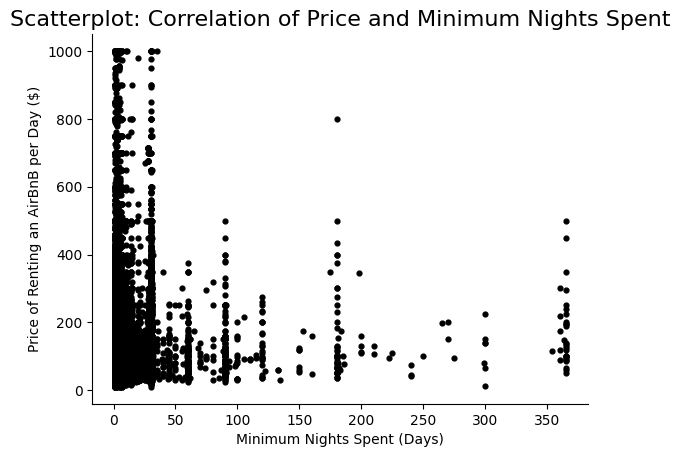

In [25]:
fig, ax = plt.subplots()

final_df.plot(kind="scatter", x="minimum_nights", y="price", ax=ax, color= "black", s = 12)
for side in ["right", "top"]:
    ax.spines[side].set_visible(False)
ax.set_ylabel("Price of Renting an AirBnB per Day ($)")
ax.set_xlabel("Minimum Nights Spent (Days)")
plt.title('Scatterplot: Correlation of Price and Minimum Nights Spent', fontsize = 16);

Lastly a scatterplot was genearted to measure the correlation between "Price" and "Minimum Nights Spent". From the graph shown above, even without a fitted line, we can hardly see any correlation between the predictor and the dependent variable. Although we do see a drop in the prices for listings with more minimum nights spent. This should be expected since the more expensive a listing is, the less likely a person would require minimum nights spent and that place. That being said, there does seem to be some observations at the 365 day mark which charges upward of 400 - 600 dollars per night. Moving forwards, a more indepth look should be taken into lookin at those listings which charges a large amount of money per day with a minimun stay of a year, to determine whether the observation can be due to human error and be removed from the analysis.

# Project 2

## New Dataset

Crime data was taken from the NYC police department found at the website: https://www.nyc.gov/site/nypd/stats/crime-statistics/crime-statistics-landing.page

In [26]:
crime = pd.read_csv("C:/Users/justi/Desktop/Uni/Year 3/semester 2/Eco 225/Data/NYPD_Complaint_Data_Historic.csv", 
                    low_memory=False)

In [28]:
# From the data footnotes we know that "CMPLNT_FR_DT" is the exact date of occurence

# We remove any NaN values from that column.
filt = crime["CMPLNT_FR_DT"].notna()
crime = crime[filt]

# Since We are dealing with Airbnb data in 2019 we will filter through only crimes comitted in 2019.
filt = crime["CMPLNT_FR_DT"].str.contains("2019")
crime = crime[filt]

# We are only interested in Violent crimes thus we filter through only felony crimes comitted.
filt = crime["LAW_CAT_CD"] == "FELONY"
crime = crime[filt]

filt = crime["OFNS_DESC"].notna()
crime = crime[filt]


crime["OFNS_DESC"].unique()
crime

# Making a Coordinates Column in the DataFrame
crime["Coordinate"] = list(zip(crime.Longitude, crime.Latitude))
crime["Coordinates"] = crime["Coordinate"].apply(Point)

## The Message

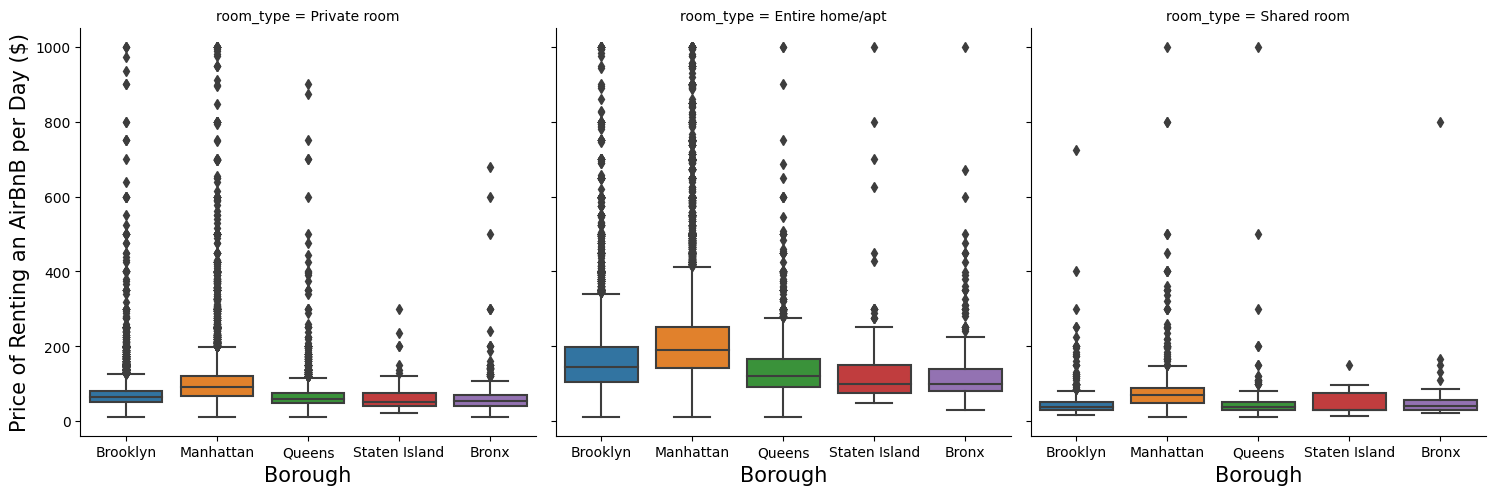

In [764]:
plot_ = sns.catplot(kind='box', 
            data = final_df, 
            x = 'neighbourhood_group', 
            y = 'price', 
            col = 'room_type').set_ylabels("Price of Renting an AirBnB per Day ($)", fontsize=15)
plot_.set_xlabels("Borough", fontsize=15)

plt.show()

In doing this Paper, the main goal is to determine why Airbnb homes are listed at their price, and what are the factors which goes into a users decision making in determining this price. From the plot generated above, we split our data into multiple subgroups of types of rooms listed on Airbnb and which Borough these listings are found in. From the diagram above we can see that are a noticeable differences in the prices of Airbnb Listings when it comes to the type of rooms being offered in each borough. We suggest that these differences seen are due to variations in the tourism and business activity occuring in each borough and that the further away we move from business districts, the more affordable the housing.

## Maps and Interpretations

### Loading in Shape Files

We are using 2 different Newyork Shape Files, one contains the boundaries between each boroughs and the other contains the boundaries between each neighbourhood tabulated areas:

In [31]:
nyc = gpd.read_file("C:/Users/justi/Desktop/Uni/Year 3/semester 2/Eco 225/Data/nynta2020_23a.zip")
nyc = nyc.to_crs(epsg=4326)

In [32]:
newyork_df = gpd.read_file("C:/Users/justi/Desktop/Uni/Year 3/semester 2/Eco 225/Data/nyu_2451_34490.zip")
newyork_df = newyork_df.to_crs(epsg=4326)

In [33]:
# Making the GeoDataFrame from the Airbnb Data set
final_df["Coordinate"] = list(zip(final_df.longitude, final_df.latitude))
final_df["Coordinates"] = final_df["Coordinate"].apply(Point)

In [34]:
# 3 Minutes Runtime
#lst = []
#for i in final_df["Coordinates"].to_list():
#    name_ = ''
#    index_ = 0
#    for r in nyc["geometry"].to_list():
#        if r.contains(i) is True:
#            name_ = nyc.loc[index_].NTAName
#        index_ += 1
#    lst.append(name_) 
#final_df["Neighbourhood Clean"] = lst
#final_df.to_csv('Airbnb_final.csv', index = False)

In [59]:
final_df = pd.read_csv('Airbnb_final.csv')
filt = final_df["Neighbourhood Clean"] != ''
final_df = final_df[filt]

In [58]:
plot1 = final_df.groupby("Neighbourhood Clean")[['price']].mean().reset_index()
nyc2 = pd.merge(nyc, plot1, left_on="NTAName", right_on="Neighbourhood Clean")

For Crime

In [40]:
# 9 Minutes Runtime
#lst = []
#for i in crime["Coordinates"].to_list():
#    name_ = ''
#    index_ = 0
#    for r in nyc["geometry"].to_list():
#        if r.contains(i) is True:
#            name_ = nyc.loc[index_].NTAName
#        index_ += 1
#    lst.append(name_) 
#crime["Neighbourhood Clean"] = lst
#crime.to_csv('NYC_crime_clean.csv', index = False)

In [41]:
crime = pd.read_csv('NYC_crime_clean.csv')
filt = crime["Neighbourhood Clean"] != ''
crime = crime[filt]

In [71]:
plot2 = crime.groupby("Neighbourhood Clean")[['CMPLNT_NUM']].count().reset_index()
nyc3 = pd.merge(nyc, plot2, left_on="NTAName", right_on="Neighbourhood Clean")

More than 2 listings:

In [85]:
filt = final_df['calculated_host_listings_count'] > 2
list_df = final_df[filt]

plot3 = list_df.groupby("Neighbourhood Clean")[['calculated_host_listings_count']].count().reset_index()
nyc4 = pd.merge(nyc, plot3, left_on="NTAName", right_on="Neighbourhood Clean")

### Map 1:

In [65]:
plt.rcParams.update({'font.size': 15})

In [66]:
# Making the GeoDataFrame from the Airbnb Data set
final_df["Coordinate"] = list(zip(final_df.longitude, final_df.latitude))
final_df["Coordinates"] = final_df["Coordinate"].apply(Point)

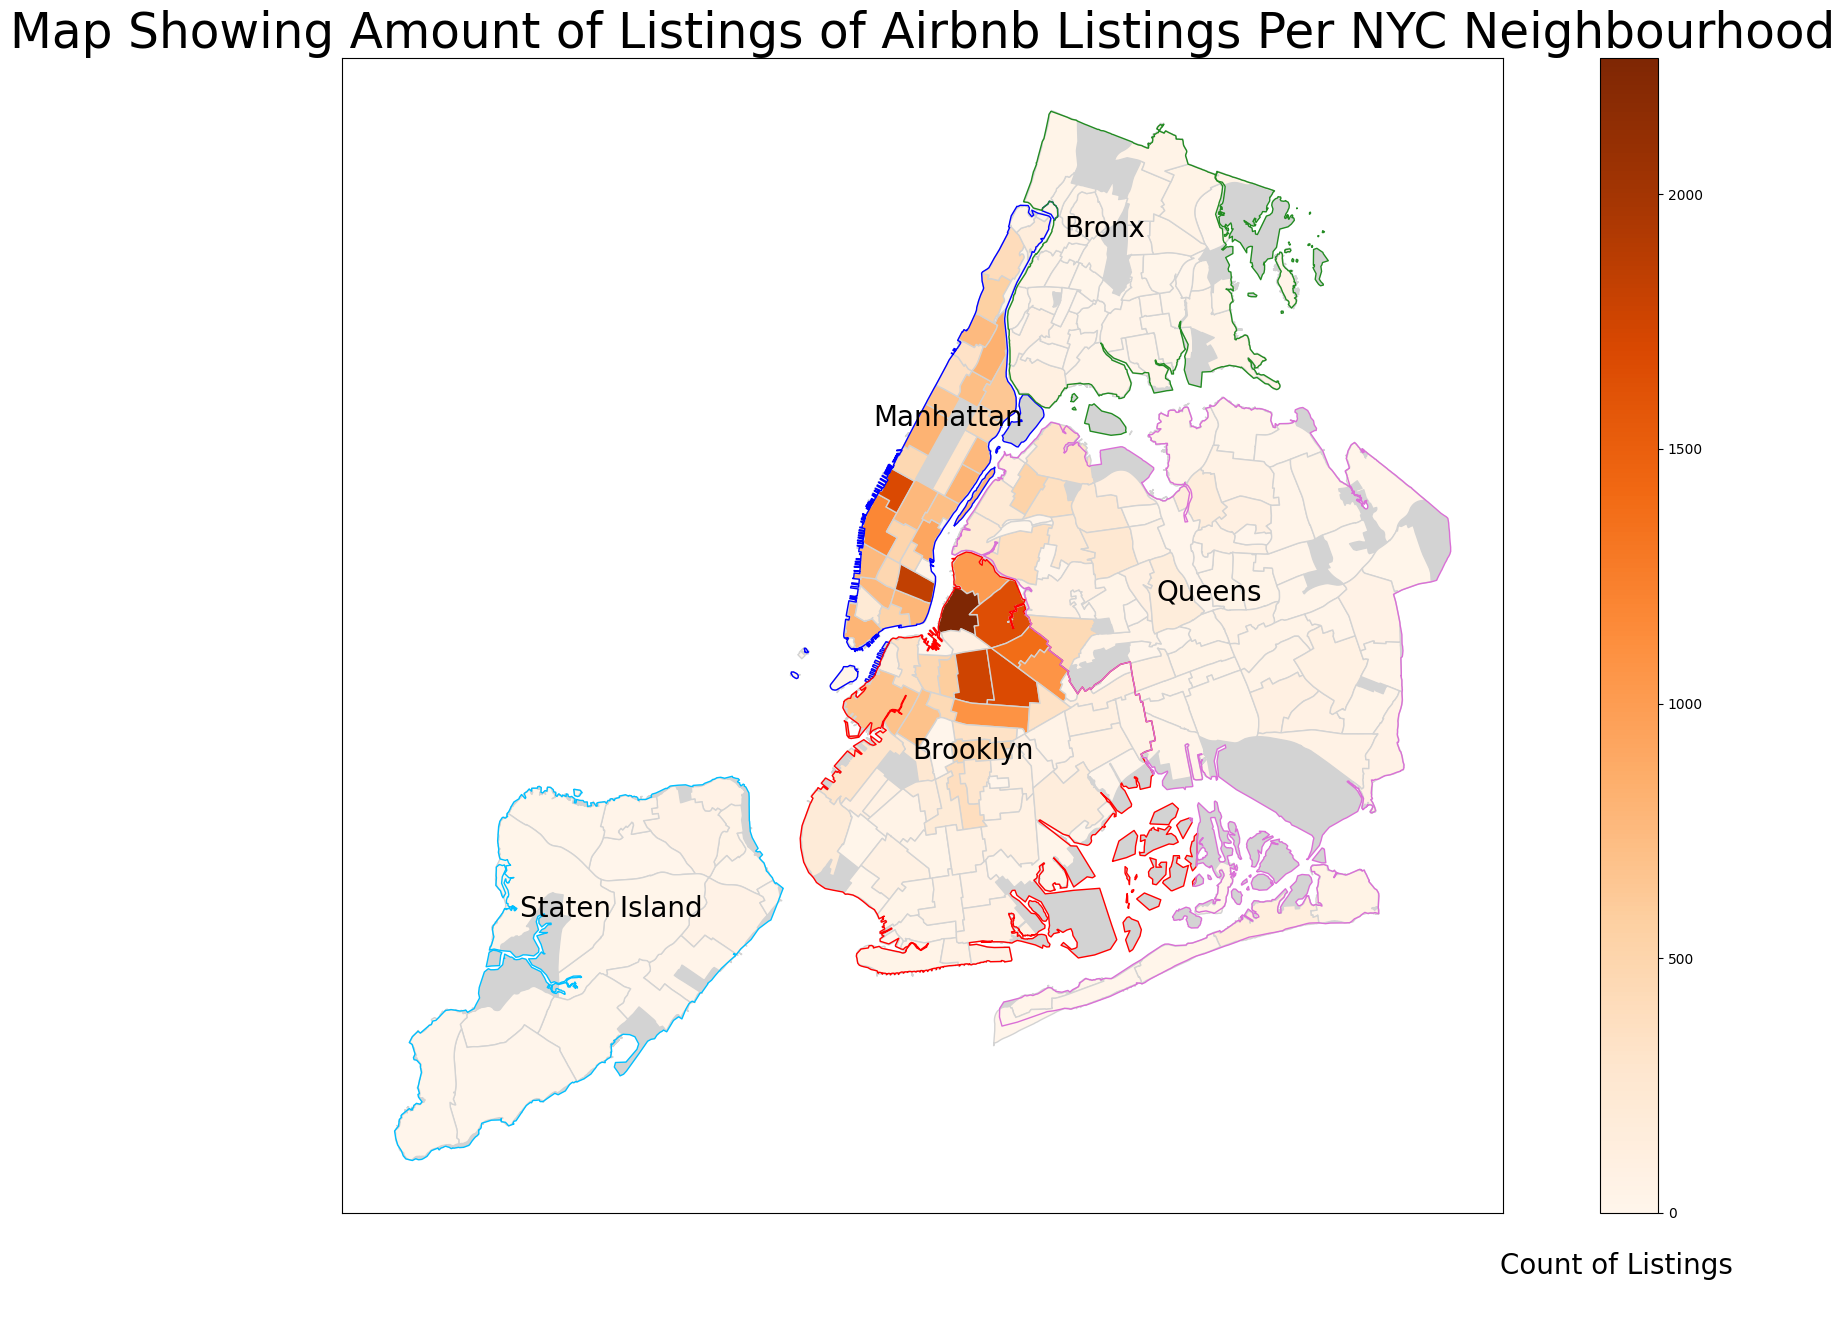

In [761]:
plot_ = final_df.groupby("Neighbourhood Clean")[['price']].count().reset_index()
nyc1 = pd.merge(nyc, plot_, left_on="NTAName", right_on="Neighbourhood Clean")

fig, gax = plt.subplots(figsize = (25,15))

# Plotting
newyork_df.plot(ax = gax, edgecolor = "None", color = "lightgrey")

nyc1.plot(ax = gax, edgecolor = "lightgrey", column = "price", legend=True, cmap='Oranges',
    vmin=0, vmax=nyc1["price"].max()) #range of your column value for the color legend

for i in [("Manhattan","blue"),("Bronx","forestgreen"), ("Brooklyn","red"), 
          ("Queens","orchid"), ("Staten Island","deepskyblue")]:
    newyork_df.query("bname == '{}'".format(i[0])).plot(ax = gax, edgecolor = i[1], color = "None")

    
# Aesthetics
for a, b, label in zip(newyork_df['center'].x, newyork_df['center'].y, newyork_df['bname']):
    gax.annotate(label, xy=(a - 0.04,b + 0.01), xytext=(4,4), textcoords='offset points', fontsize=20, color = "Black")

gax.set_title("Map Showing Amount of Listings of Airbnb Listings Per NYC Neighbourhood", fontsize = 35)
gax.annotate('Count of Listings',xy=(0.6, 0.040),  xycoords='figure fraction', fontsize = 20)

plt.tick_params(bottom = False,      
    top = False,
    left = False,
    labelbottom=False,
    labelleft=False)

From our Map above we can get a sense of the areas where users are listing their homes on Airbnb. We can see that the density of listings are high between the areas of Manhatten, Queens and Brooklyn. The borough of Manhatten seems to be the most dense with Airbnb listings which makes sense as it most visited part of New York City. The borough of Brooklyn would be second and then Queens, and also Bronx. Despite having a land size that is twice that of manhatten, according to the heat map, Saten island is least dense of the boroughs in terms of Airbnb listings. This map helps us envision where most observations are located which would be helpful in determining wether or not there are outliers in the data later on in our analysis.

### Map 2

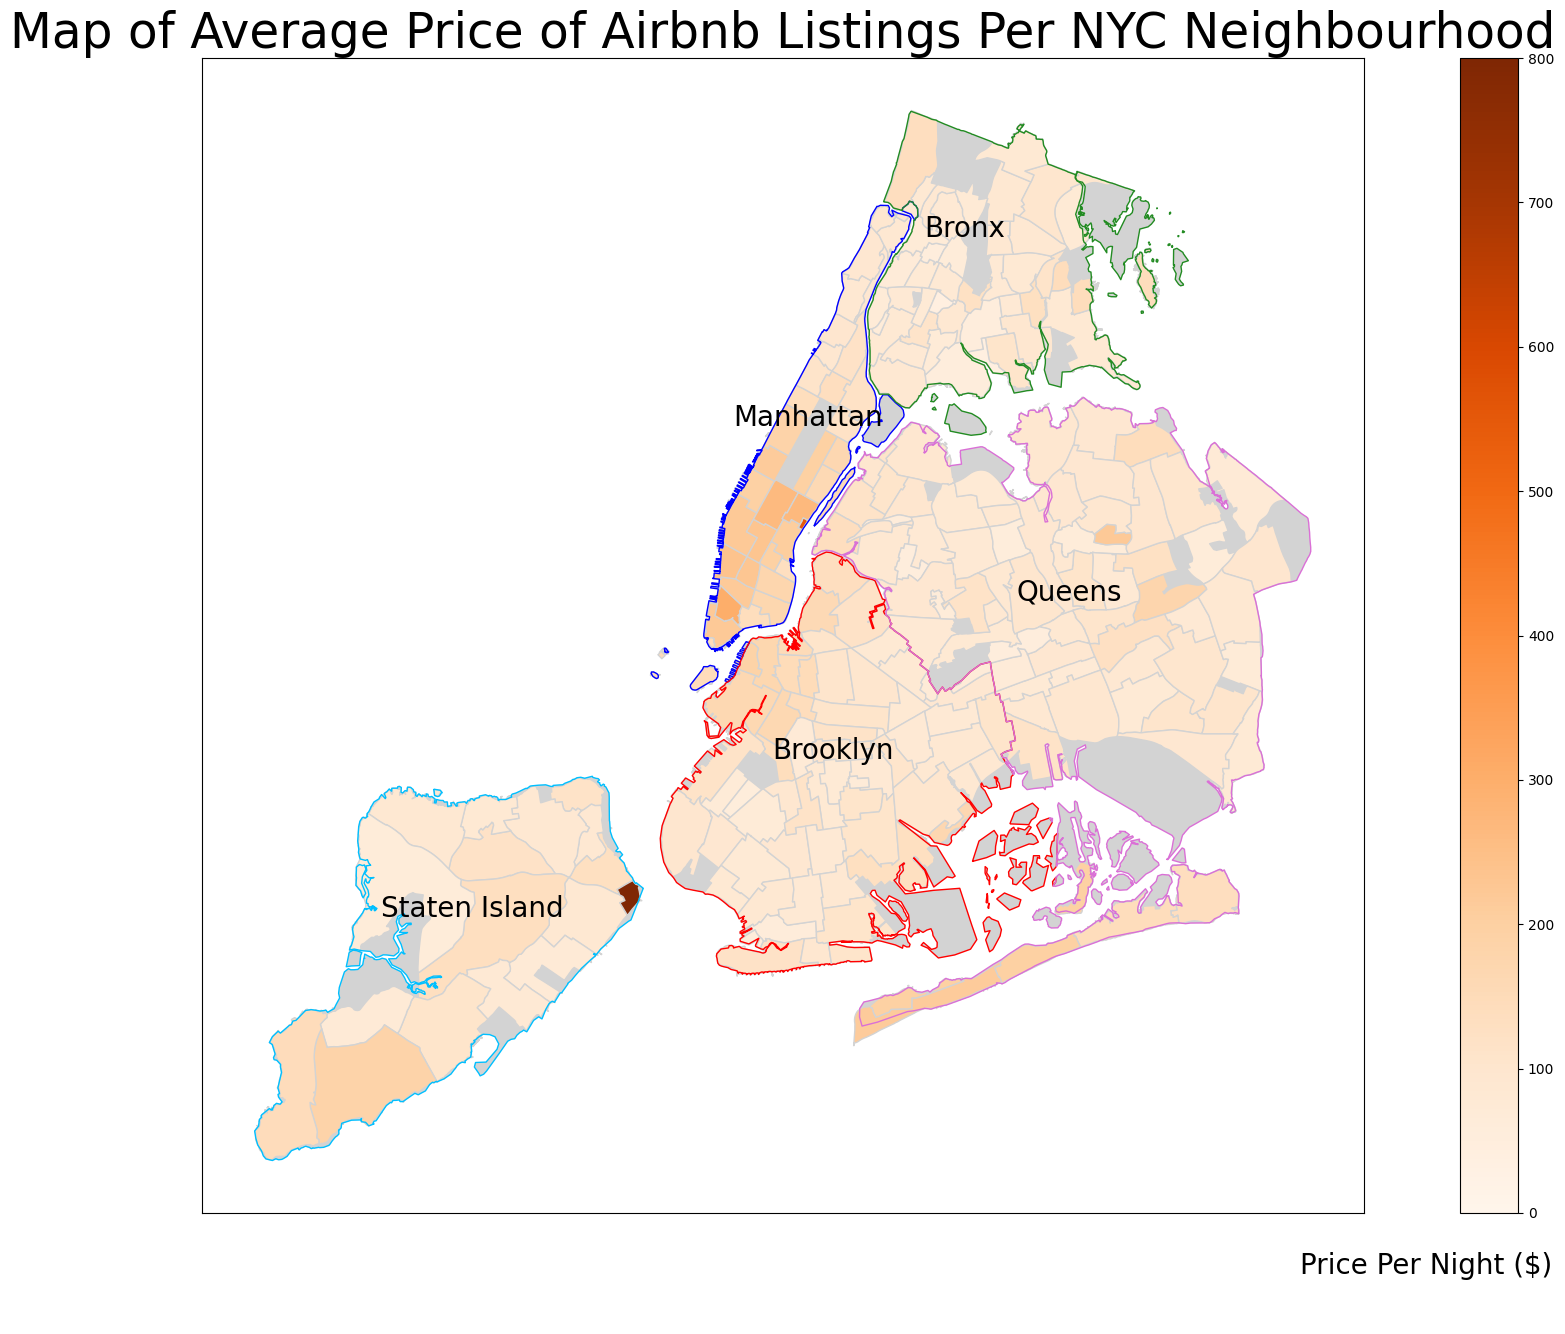

In [754]:
fig, gax = plt.subplots(figsize = (25,15))

# Plotting
newyork_df.plot(ax = gax, edgecolor = "None", color = "lightgrey")

nyc2.plot(ax = gax, edgecolor = "lightgrey", column = "price", legend=True, cmap='Oranges',
    vmin=0, vmax=nyc2["price"].max()) #range of your column value for the color legend

for i in [("Manhattan","blue"),("Bronx","forestgreen"), ("Brooklyn","red"), 
          ("Queens","orchid"), ("Staten Island","deepskyblue")]:
    newyork_df.query("bname == '{}'".format(i[0])).plot(ax = gax, edgecolor = i[1], color = "None")

    
# Aesthetics
for a, b, label in zip(newyork_df['center'].x, newyork_df['center'].y, newyork_df['bname']):
    gax.annotate(label, xy=(a - 0.04,b + 0.01), xytext=(4,4), textcoords='offset points', fontsize=20, color = "Black")

gax.set_title("Map of Average Price of Airbnb Listings Per NYC Neighbourhood", fontsize = 35)
gax.annotate('Price Per Night ($)',xy=(0.52, 0.040),  xycoords='figure fraction', fontsize = 20)

plt.tick_params(bottom = False,      
    top = False,
    left = False,
    labelbottom=False,
    labelleft=False)

The choropleth map above shows the average Airbnb rental price for a neighbourhood in each of the five boroughs in New York City. From the map, we can see that the average Airbnb listings is usually around the 100 - 400 mark in each neighbourhood with general higher price goin. Taking a look at Manhatten and comparing it to its neighbouring boroughs, we can see a general darker shade of around 300 - 400 dollars on average for listings in its neighbourhoods whilst the neighbourhoods in the boroughs Brooklyn and Queens that are near to Manhatten are in the 200 to 300 dollar range. We know that Times Square is located at the heart of Manhatten so using this graph we can explain why average house prices start to increase after being 15 kilometers away. We find that most of the points shaded in darker orange that are away from Times Square are found on coast lines of the boroughs like Saten Island and Queens. This seems to make sense as lake front properties usually are higher than inland properties based on the promises of being close to the beach. However, this still does not explain why there is such a large difference between the Airbnb prices. Well, taking a look again at the first Map, we can see that the density of listings drop when moving away from the intersection of Brooklyn, Manhatten and Queens. Using this information and the average prices per neighbourhood in this map, we can deduce that there may not enough observations in the the neighbourhoods as we move away from Times Square thus giving a bigger weight to the more expensive listing to sekew the average of the house prices in those locations.

### Map 3

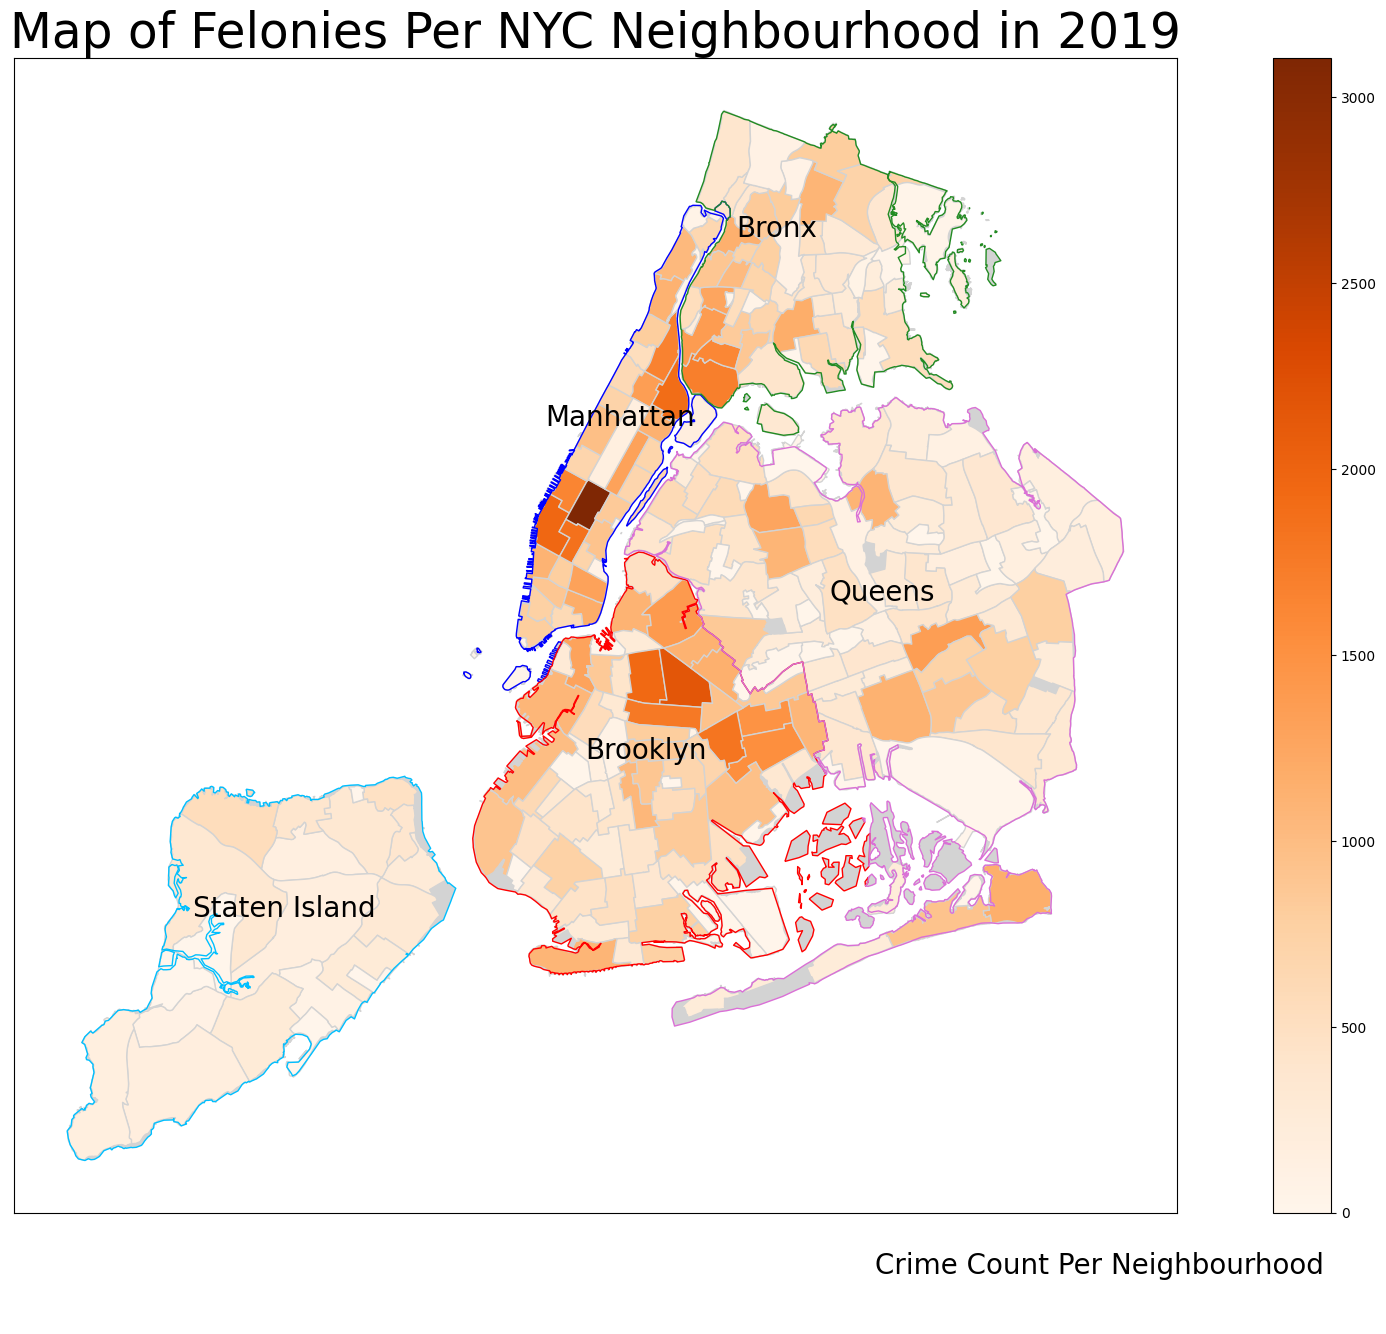

In [750]:
fig, gax = plt.subplots(figsize = (25,15))

# Plotting
newyork_df.plot(ax = gax, edgecolor = "None", color = "lightgrey")

nyc3.plot(ax = gax, edgecolor = "lightgrey", column = 'CMPLNT_NUM', legend=True, cmap='Oranges',
    vmin=0, vmax=nyc3['CMPLNT_NUM'].max()) #range of your column value for the color legend

for i in [("Manhattan","blue"),("Bronx","forestgreen"), ("Brooklyn","red"), 
          ("Queens","orchid"), ("Staten Island","deepskyblue")]:
    newyork_df.query("bname == '{}'".format(i[0])).plot(ax = gax, edgecolor = i[1], color = "None")

    
# Aesthetics
for a, b, label in zip(newyork_df['center'].x, newyork_df['center'].y, newyork_df['bname']):
    gax.annotate(label, xy=(a - 0.04,b + 0.01), xytext=(4,4), textcoords='offset points', fontsize=20, color = "Black")

gax.set_title("Map of Felonies Per NYC Neighbourhood in 2019", fontsize = 35)
gax.annotate('Crime Count Per Neighbourhood',xy=(0.35, 0.040),  xycoords='figure fraction', fontsize = 20)

plt.tick_params(bottom = False,      
    top = False,
    left = False,
    labelbottom=False,
    labelleft=False)

In deciding what types of crimes we should include in our analysis of Airbnb listing prices we first start of with Burglaries. From the Map, we can see that the number of Burglaries committed in 2019 were high in the boroughs of Manhatten, Bronx, Queen and Brooklyn. Staten Island had the lowest of the 5 boroughs in terms of burglaries comitted in 2019 with a range of zero to 10 burglaries being comitted in total for each neighbourhood. This may be in part due to the borough's small population density (3,327 people per sq km) or that this area is the least visited of all the 5 boroughs in NYC. Manhatten has more than 4 times the population density of that of Staten island, which means that crimes are more likley to be comitted closer to one another. From this map, there does not seem to be a relationship between the number of burglaries being comitted and the price of Airbnb listings since neighbourhoods shaded in a color that indicates high levels of burglaries being comitted in 2019 are either high priced or low priced as shown in the Average Price Map before. This result shows us that although some Airbnb listings are situated in high crime locations in NYC like downtown Manhatten, there are still incentives for people to rent these places since these places are high tourist destinations. 

### Map 4

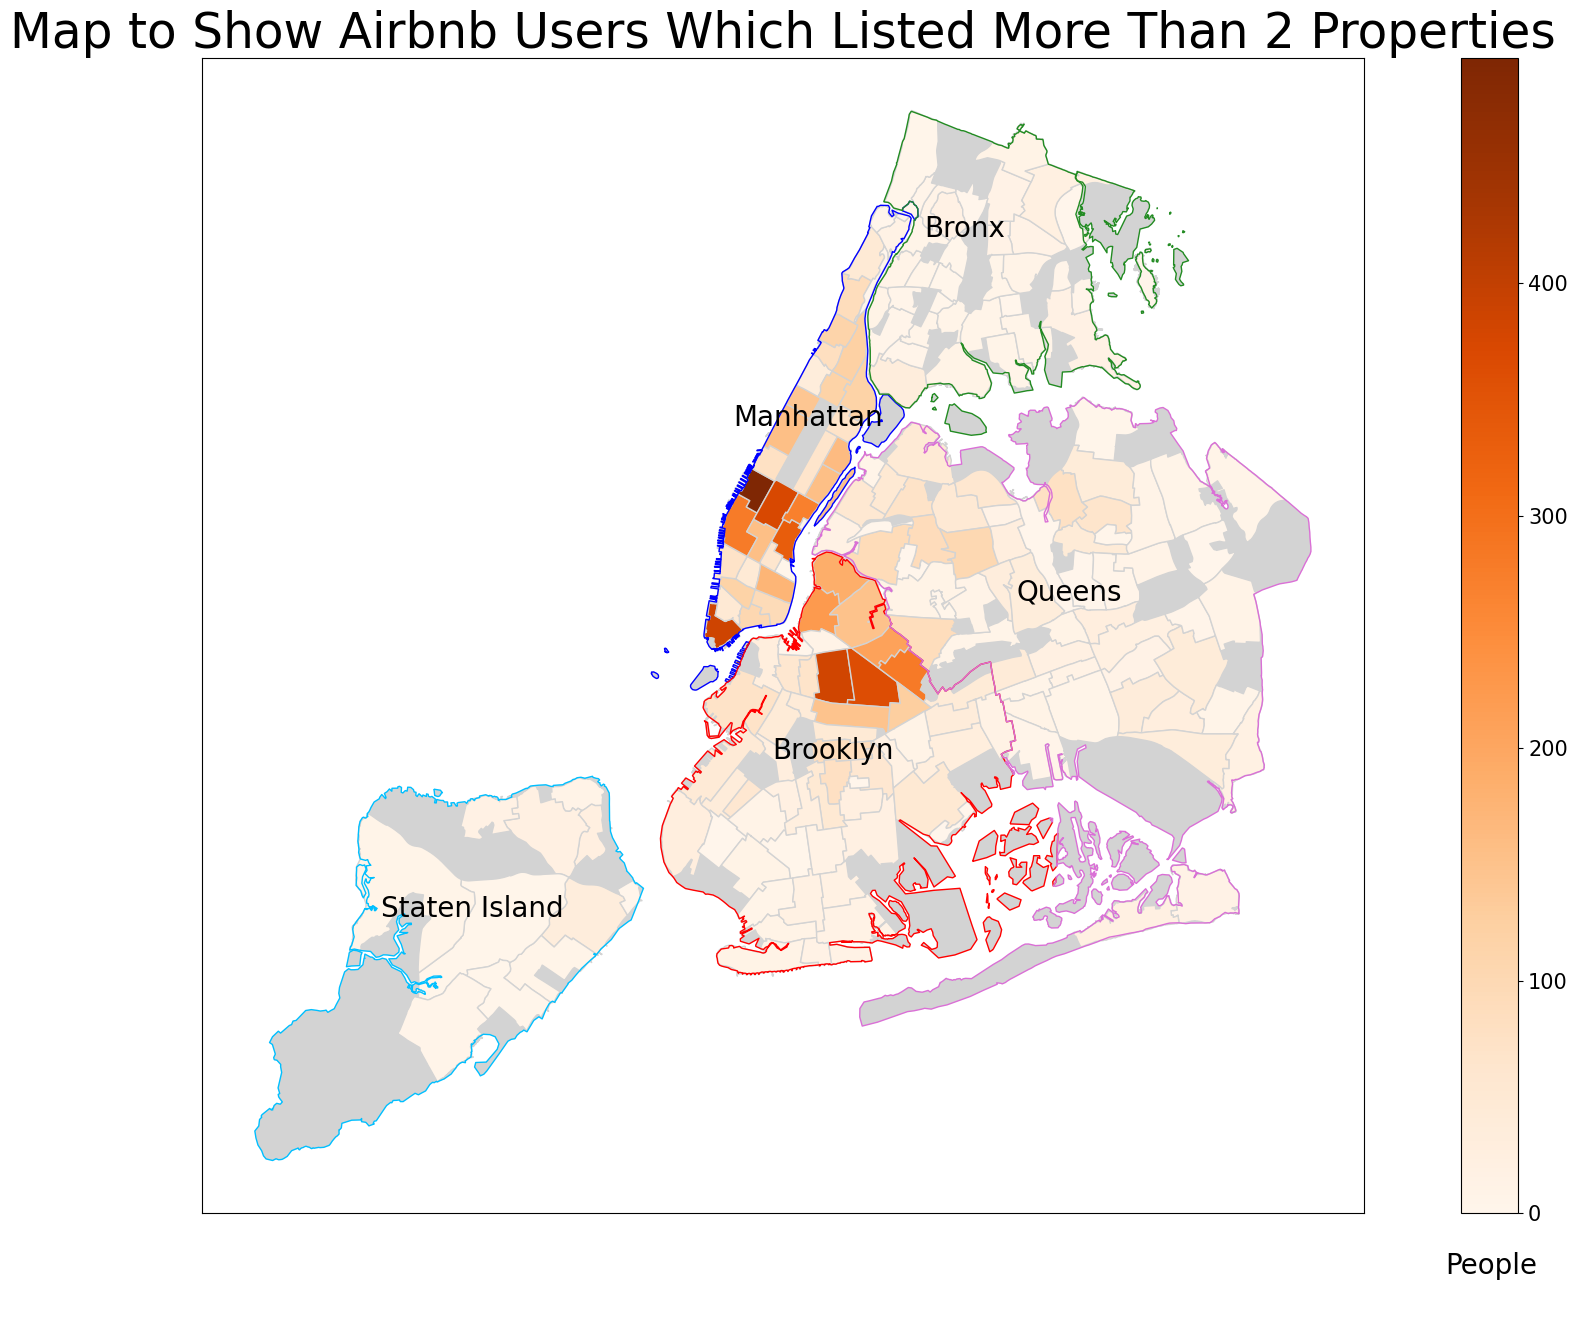

In [118]:
fig, gax = plt.subplots(figsize = (25,15))

# Plotting

newyork_df.plot(ax = gax, edgecolor = "None", color = "lightgrey")

nyc4.plot(ax = gax, edgecolor = "lightgrey", column = "calculated_host_listings_count", legend=True, cmap='Oranges',
    vmin=0, vmax=nyc4["calculated_host_listings_count"].max()) #range of your column value for the color legend)


for i in [("Manhattan","blue"),("Bronx","forestgreen"), ("Brooklyn","red"), 
          ("Queens","orchid"), ("Staten Island","deepskyblue")]:
    newyork_df.query("bname == '{}'".format(i[0])).plot(ax = gax, edgecolor = i[1], color = "None")

# Aesthetics

for a, b, label in zip(newyork_df['center'].x, newyork_df['center'].y, newyork_df['bname']):
    gax.annotate(label, xy=(a - 0.04,b + 0.01), xytext=(4,4), textcoords='offset points', fontsize=20, color = "Black")
    
gax.set_title("Map to Show Airbnb Users Which Listed More Than 2 Properties", fontsize = 35)
gax.annotate('People',xy=(0.578, 0.040),  xycoords='figure fraction', fontsize = 20)

plt.tick_params(bottom = False,      
    top = False,
    left = False,
    labelbottom=False,
    labelleft=False)

The map above shows the neighbourhoods where those listings found on Airbnb can be tied back to an owner which has more than 2 properties listed on the App. From this diagram we can see that from the users which own more than 2 listings, most of those listings are situated in high tourist areas like Manhatten, North Brooklyn and Parts of Queens with most listings being situated in Manhatten. This graph gives shows that Airbnb users which lists more than two porperties on Airbnb are mostly listing them in areas where there is high demand for temporary housing which then again would be areas where tourists frequent. This does not mean that toursim is the main factor behind where people choose to list their homes on Airbnb. High business areas also get alot of foot traffic from businessmen/women. People going on business trips can also account for these higher prices in Airbnb listings.

# Project 3

## Potential Data to Scrape

As discussed before, tourism, can be a factor which affects the price of an Airbnb listing. We know that tourism does not stay constant year round and that it varies month to month. From this, we generally expect there to be more Airbnb listings during the summer months as they are the peak travel months and people going on vacation may decide to list their home. Thus it should be expected that the pricing for these listings can also increase during the peak travel months as more people are looking for short term housing. 

We can HTML webscrape the Airbnb website ([Airbnb.com](https://www.airbnb.ca/s/New-York-City--New-York--United-States/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&price_filter_input_type=0&price_filter_num_nights=1&channel=EXPLORE&query=New%20York%20City%2C%20New%20York%2C%20United%20States&date_picker_type=calendar&place_id=ChIJOwg_06VPwokRYv534QaPC8g&source=structured_search_input_header&search_type=unknown)), every month for each listing found in New York City and figure out the patterns in pricing during different periods of tourism months in New York City. This data can then be combined with the current 2019 dataset to factor in the differences in seasonality and it's effects the prices of listings in each New York City Neighbourhood.

## Potential Challenges

This potential to collect time trend data in the Airbnb market, however, may seem to be more difficult than thought. Firstly, scraping the Airbnb website monthly would take a substantial amount of time to accumulate the data. The monthly datasets scraped would be very large, since one month of observations gives around (45k listings). We would also have to clean the datasets for any errors like we did with our current dataset and then find a way to combine all of them. Also, since our current dataset was collected from a month in 2019, we would like to collect the Airbnb data from other months in 2019. This raises another obstacle as the Airbnb website only contains the most recent and up to date informations about listings so any scraping being done would be on listings in 2023. We can access archived data from Airbnb from the website ([insideairbnb.com](http://insideairbnb.com/new-york-city)), however, we would need to send in a request for this data which takes a long time to be approoved and also requires funding since the priority given to research by individuals is low. Lastly, if we were to get access to past data, our current dataset only contains observations during a singular month in the year 2019 (although stated in the Kaggle description that this dataset is an annual accumulation, tracing the information back to the original source shows that the dataset collected, is actually just observations for a month in 2019). This makes it difficult to measure a time trend, as combining datasets would be difficult given that there is no time period for the current dataset (the information can be found but requires special access from the data provider).

## Scraping Data from a Website

Since it is unfeasible to collect a time trend in the Airbnb data given the time constraints and lack of funding, we turn our attention to scraping income data from another website found at:

[https://statisticalatlas.com/place/New-York/New-York/Household-Income](https://statisticalatlas.com/place/New-York/New-York/Household-Income)

The website provided above, shows the annual median household income across different New York City neigbourhoods. The data found in the table from the link, however, is limited to only 57 different neighbourhoods in Nyc and inorder to collect infomation on all of the neighbourhoods in five boruoghs (around 200), we would have to scrape the data found in each borough's website section, concatenate the datasets and elimite the duplicates found from the overlapping data in each borough's webpage and the general NYC webpage. Since the format for each webpage is similar, we can create a python html scrapper which extracts the observations given the location of the table in the webpage. We describe the function below and link the other webpages used:

Staten Island: [https://statisticalatlas.com/county-subdivision/New-York/Richmond-County/Staten-Island/Household-Income](https://statisticalatlas.com/county-subdivision/New-York/Richmond-County/Staten-Island/Household-Income)

Manhatten: [https://statisticalatlas.com/county-subdivision/New-York/New-York-County/Manhattan/Household-Income](https://statisticalatlas.com/county-subdivision/New-York/New-York-County/Manhattan/Household-Income)

Brooklyn: [https://statisticalatlas.com/county-subdivision/New-York/Kings-County/Brooklyn/Household-Income](https://statisticalatlas.com/county-subdivision/New-York/Kings-County/Brooklyn/Household-Income)

Queens: [https://statisticalatlas.com/county-subdivision/New-York/Queens-County/Queens/Household-Income](https://statisticalatlas.com/county-subdivision/New-York/Queens-County/Queens/Household-Income)

Bronx: [https://statisticalatlas.com/county-subdivision/New-York/Bronx-County/Bronx/Household-Income](https://statisticalatlas.com/county-subdivision/New-York/Bronx-County/Bronx/Household-Income)

In [701]:
# We create a Scraper Function to Help us Scrape Each Websites, 
# that way the process is cleaner and easier to manage

def scraper(website, location):
    """ Returns a Pandas DataFrame containing a column for Neighbourhood name
    and the Annual Median Income for that Neighbourhood given the website link
    and the location/index of the table on the website.
    """
    # Scrape the entire Webpage
    response = requests.get(website)
    # Create a Beautiful Soup Object from the content of the response
    soup_object = BeautifulSoup(response.content)
    # The observations we are interested in are found in the class 
    # figure-contents
    # Using the location index, we extract the the targeted table 
    # from the list of all observed "figure-contents" classes found on the page.
    income_table = soup_object.find_all("div", {"class": "figure-contents"})[location]
    # We notice that the income value is stored in the 'rect' so we 
    # find all observations
    # from our table that has the 'rect' tag and then
    # store them in the variable "income_values"
    income_values = income_table.find_all('rect')
    # We notice that the neighbourhood name is stored in the 'a' (hyperlinks tag) 
    # so we find all observations from our table that has the 'a' tag and then
    # store them in the variable "names_values"
    names_values = income_table.find_all('a')
    # Create empty lists to store our scraped data
    neighbourhood = []
    income = []
    
    # Iterate on the list of income_values 
    for row in income_values:
        # find the tag title which contains the income values
        value = row.find_all('title')
        # if the methods returns a non empty list, we extract the first value
        # Remove the dollar sign and comma, and then convert string to float
        # then append the value to the list.
        if value != []:
            inc = float(value[0].text.replace(',', '').replace('$', ''))
            income.append(inc)
        # if the method had returned an empty list, we ignore it since
        # there was no observed income value from that "rect" tag
        
   # Iterate on the list of names_values 
    for row in names_values:
        # find the tag title which contains the neighbourhood name values
        value = row.find_all('title')
        # if the methods returns a non empty list, we extract the first value
        # We then clean the text and then append it to the List
        if value != []:
            name = value[0].text.replace('\n', '').replace('Neighborhood', '').strip()
            neighbourhood.append(name)
        # If the method returns an empty list this means that there was no
        # observed title value in that tag
        # this can be due to errors in the HTML formatting and we fix this by 
        # extracting the text from the tag and then clean and append it.
        else:
            name = row.get_text().strip()
            neighbourhood.append(name)
    # Create an Empty Data Frame
    scraped = pd.DataFrame(columns = ["neighbourhood", "income"])
    # Store the Scraped Values into the Data Frame
    scraped["neighbourhood"] = neighbourhood
    scraped["income"] = income
    # Return the Data Frame
    return scraped

In [654]:
# NYC Overview
# The table in this webpage is located in another place which we identified to
# be index 11
web_url_nyc = "https://statisticalatlas.com/place/New-York/New-York/Household-Income"
location = 11
nyc_scraped = scraper(web_url_nyc, location)

In [440]:
# Staten Island
web_url_staten = 'https://statisticalatlas.com/county-subdivision/New-York/Richmond-County/Staten-Island/Household-Income'
location = 8
staten_scraped = scraper(web_url_staten, location)

In [441]:
# Manhatten
web_url_manhatten = 'https://statisticalatlas.com/county-subdivision/New-York/New-York-County/Manhattan/Household-Income'
# since the location of the table is the same for this webpage
# we keep the location as 8
manhatten_scraped = scraper(web_url_manhatten, location)

In [443]:
# Brooklyn
web_url_brooklyn = 'https://statisticalatlas.com/county-subdivision/New-York/Kings-County/Brooklyn/Household-Income'
# since the location of the table is the same for this webpage
# we keep the location as 8
brooklyn_scraped = scraper(web_url_brooklyn, location)

In [446]:
# Queens
web_url_queens = 'https://statisticalatlas.com/county-subdivision/New-York/Queens-County/Queens/Household-Income'
# since the location of the table is the same for this webpage
# we keep the location as 8
queens_scraped = scraper(web_url_queens, location)

In [449]:
# Bronx
web_url_bronx = 'https://statisticalatlas.com/county-subdivision/New-York/Bronx-County/Bronx/Household-Income'
# since the location of the table is the same for this webpage
# we keep the location as 8
bronx_scraped = scraper(web_url_bronx, location)

## Merging the Scraped Dataset

In [459]:
# Concatenate the Data Frames Scraped
# Drop Duplicated Observations
concated = pd.concat([nyc_scraped, staten_scraped, 
                      manhatten_scraped, 
                      brooklyn_scraped, queens_scraped, 
                      bronx_scraped], axis=0).drop_duplicates()

In [703]:
# Looking at the current Dataset, we would have to fix
# the formats of some variables inorder to merge correctly
lst = []
for i in final_df["neighbourhood"].to_list():
    var = i.replace("-", " ")
    lst.append(var)
final_df["neighbourhood"] = lst

merged_df = pd.merge(final_df, concated, on = "neighbourhood", how="outer")
# Save dataset just in case
merged_df.to_csv('merged_df.csv', index = False)

## Visualizing the Scraped Dataset

We can make several visualizations to analyse our scrapped data shown below:

In [716]:
summary_tab = merged_df.copy().dropna()
numerical_variables = summary_tab.select_dtypes(["number"]).columns

rename_ = {"price" : "Price", "income": "Income"}

table = summary_tab[numerical_variables].iloc[:, [0,10]]
table.rename(columns = rename_).describe().round(3)

,Price,Income
count,44358.000,44358.000
mean,138.752,70941.698
std,115.703,32224.018
min,10.000,22652.041
25%,65.000,46899.141
50%,100.000,54422.657
75%,175.000,98102.941
max,1000.000,225119.816


Looking at a short summary table, we can see that we were able to successfully webscrape and match 44358 observations out of the total 48631 observations in the Airbnb Data Frame. Analysing the data from this table, we can compare the variables of price and income levels across the whole of New York City, however, this does not provide any differences across boroughs.

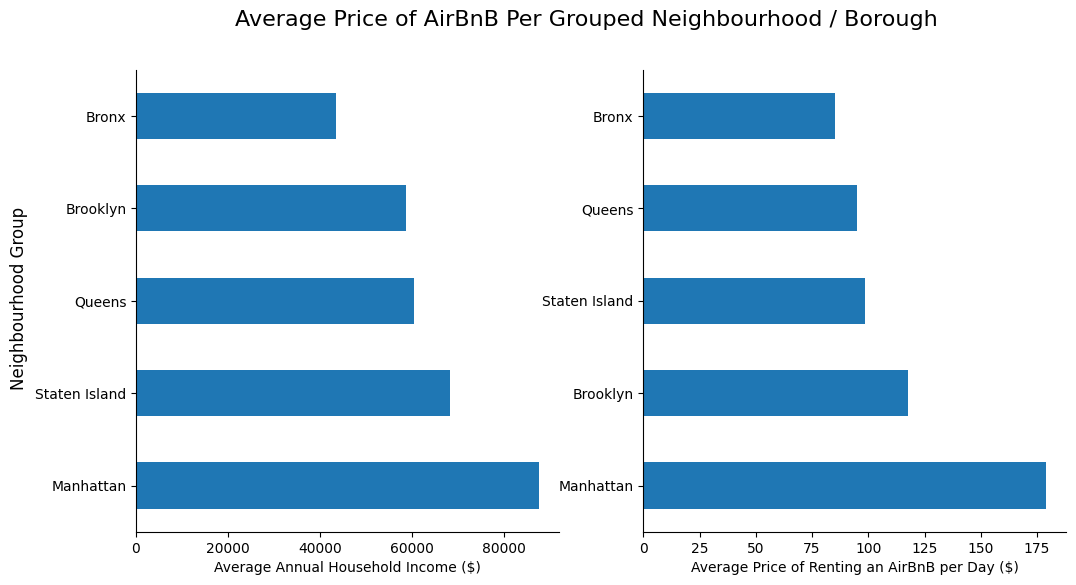

In [698]:
barc = merged_df.groupby("neighbourhood_group")["income"].mean().sort_values(ascending = False)

fig, ax = plt.subplots(1,2, figsize=(12,6))


barc.plot(kind = "barh", y = "values", ax = ax[0], color = "tab:blue")
ax[0].set_xlabel("Average Annual Household Income ($)")

barc2 = final_df.groupby("neighbourhood_group")["price"].mean().sort_values(ascending = False)
barc2.plot(kind = "barh", y = "values", ax = ax[1], color = "tab:blue")

for side in ["right", "top"]:
    ax[0].spines[side].set_visible(False)
    ax[1].spines[side].set_visible(False)

for i in range(2):
    ax[i].set_ylabel("")

fig.supylabel("Neighbourhood Group")
ax[1].set_xlabel("Average Price of Renting an Airbnb per Day ($)")
fig.suptitle("Average Price of AirBnB Per Grouped Neighbourhood / Borough", fontsize = 16);

Recall the barchart created in Project one where we comapred the Average Price of Renting an Airbnb per Day across the different boroughs on the right. Using the income data which we scraped, we can now create a bar chart showing the differences in the average annual median household income across difference boroughs in NYC. In comparing the two charts we can see some evidence of correlation between income and the rental price of listings. For example, Manhatten is seen as a high income city and this is reflected in the high average price of a Airbnb listing in the borough. The bronx has the lowest household income levels of the five boroughs and this is reflected well in the rental price of listings in the Bronx. The boroughs of Queens, Saten Islands and Brooklyn however have switched positions, however the differences between each borough is minimal in both charts. What interesting to note is that Saten Ssland has a higher median income level than Brooklyn, however, there is still a noticeable higher rental price seen in Brooklyn thanin Staten Island. Perhaps we can explore this further on in the sections.

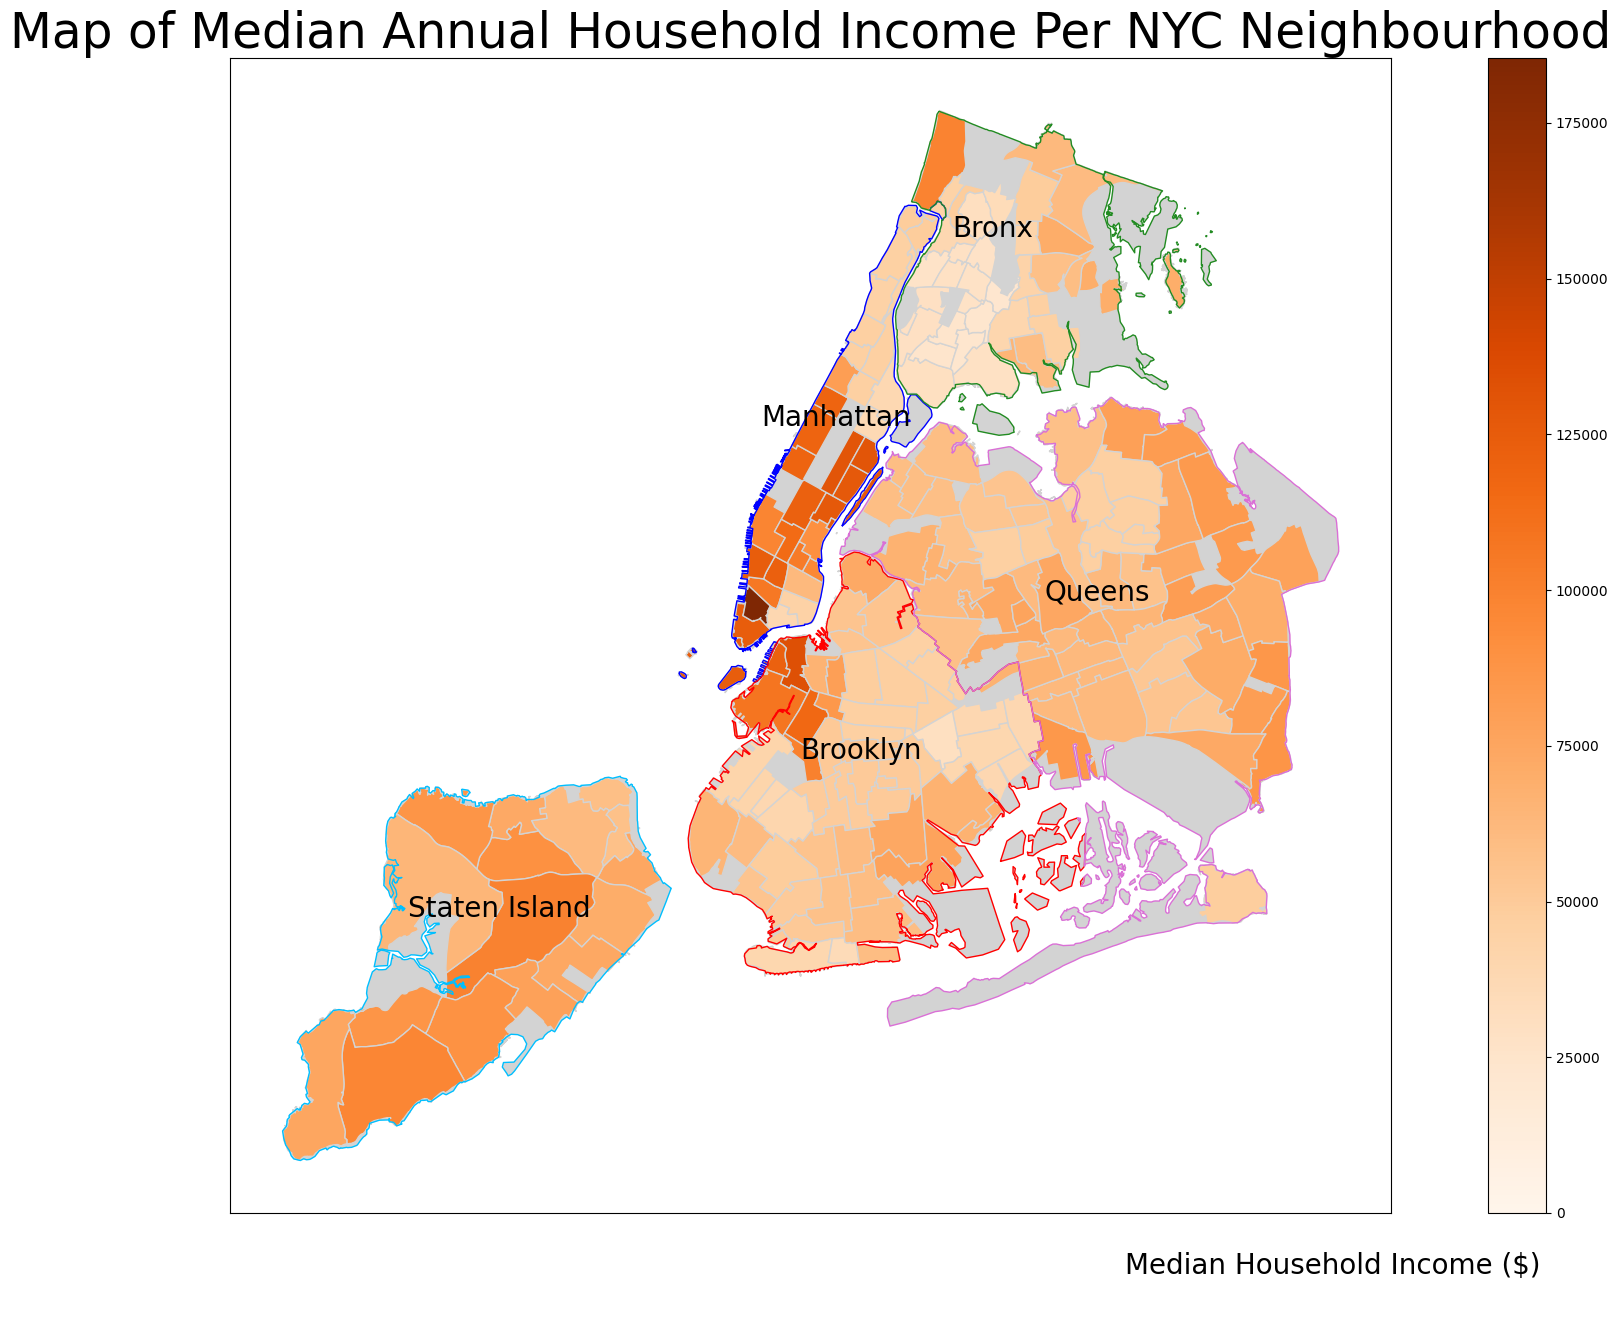

In [722]:
plot4 = merged_df.groupby("Neighbourhood Clean")[['income']].mean().reset_index()
nyc5 = pd.merge(nyc, plot4, left_on="NTAName", right_on="Neighbourhood Clean")

fig, gax = plt.subplots(figsize = (25,15))

# Plotting
newyork_df.plot(ax = gax, edgecolor = "None", color = "lightgrey")

nyc5.plot(ax = gax, edgecolor = "lightgrey", column = "income", legend=True, cmap='Oranges',
    vmin=0, vmax=nyc5["income"].max()) #range of your column value for the color legend

for i in [("Manhattan","blue"),("Bronx","forestgreen"), ("Brooklyn","red"), 
          ("Queens","orchid"), ("Staten Island","deepskyblue")]:
    newyork_df.query("bname == '{}'".format(i[0])).plot(ax = gax, edgecolor = i[1], color = "None")

    
# Aesthetics
for a, b, label in zip(newyork_df['center'].x, newyork_df['center'].y, newyork_df['bname']):
    gax.annotate(label, xy=(a - 0.04,b + 0.01), xytext=(4,4), textcoords='offset points', fontsize=20, color = "Black")

gax.set_title("Map of Median Annual Household Income Per NYC Neighbourhood", fontsize = 35)
gax.annotate('Median Household Income ($)',xy=(0.45, 0.040),  xycoords='figure fraction', fontsize = 20)

plt.tick_params(bottom = False,      
    top = False,
    left = False,
    labelbottom=False,
    labelleft=False)

The barchart shows a grouped average of the median income levels across each borough of New York City. However to get a more detailed analysis we can look at a choropleth map which shows the income distributions across differen NYC neighbourhoods. From the Map we can seee that there are still some observations which are missing because we were unable to scrape it. However looking at the areas which we have data, we can see that Manhatten has the most neighbourhoods with high income households with a range of 50k to 185k. Comparing the other boroughs, we can see that the Staten Islands is the second highest and mainly comprises of nieghourhoods which have a range of 50k - 100k in median household income. The Bronx, Queens and Brooklyn has neighbourhoods in the ranges of more than  0K but also up to 125k. These larger variations in median household income levels may account for the differences seen in the income levels across all boroughs. 

## Adding a New Dataset

Since we are unable to measure the levels of tourisms across time given our project constraints we would have to think of another method to capture this variable. But how do we measure toursism? Is it the most visited places or the places where most money is spent. Let's assume that we measure tourism by the most frequented place by tourists, according to an article published on [Wikipeida](https://en.wikipedia.org/wiki/Tourism_in_New_York_City), the most visited place in Newyork City is Central Park followed by many other attractions all of which garnered more than 2 million people in a year. From project one we proposed that as the distance from Times Square increases so would the prices, however this was show not to be entirely true. What if instead of one tourist attraction we instead go by the minimum distance from the most frequented attractions from the list on Wikipedia. Thus we are hoping to use HTML websraping to extract the names of the attractions along with the location shown in table. We scrape our data as shown below:

In [588]:
plt.rcParams.update({'font.size': 10})

In [733]:
# Website to scrape data
website = "https://en.wikipedia.org/wiki/Tourism_in_New_York_City"
# Scrape the entire Website
response = requests.get(website)
# Convert to Soup object
soup_object = BeautifulSoup(response.content)
# Extract the information in regards to all
# tables found on the webpage
attract_table = soup_object.find_all("table", {"class": "wikitable"})
# Create empty lists to store the data
attractions = []
latitude = []
longitude = []
# Select the rows with the tergeted observations for names and
# location
names = attract_table[1].find_all('tr')
geo = attract_table[1].find_all("span", {"class": "geo"})

# Extracting, cleaning and appending the names
for i in names[1:]:
    name = i.find_all('a')[0].text
    attractions.append(name)

# Extracting, cleaning and appending the locations
for i in geo:
    latitude.append(float(i.text.replace(';', '').split()[0]))
    longitude.append(float(i.text.replace(';', '').split()[1]))

# Creating an Empty Data Frame
tourism = pd.DataFrame(columns = ["Rank", "Attraction",
                                  "latitude", 
                                  "longitude"])

# Store our Scraped Variables
tourism["Rank"] = range(len(attractions))
tourism["Rank"] = tourism["Rank"] +1
tourism["Attraction"] = attractions
tourism["latitude"] = latitude
tourism["longitude"] = longitude

In [556]:
# Create a new empty variable
dist_to_attrac = []
# Formating the coords for each dataset
# This enables us to run a nested for loop
lat1 = final_df["latitude"].to_list()
lon1 = final_df["longitude"].to_list()
lat2 = tourism["latitude"].to_list()
lon2 = tourism["longitude"].to_list()
gps = list(zip(lat1,lon1))
gps2 = list(zip(lat2,lon2))


# Iterate over each Airbnb listing Coordinate
# For each listing calculate the distance to each attraction coords
# Keep and Store the closest attraction distance
for i in list(gps):
    min_dis = []
    for a in gps2:
        min_dis.append(calculate_distance(i[0], i[1], a[0], a[1]))
    dist_to_attrac.append(min(min_dis))

# Store our newely created variable
final_df["Distance to Closest Attraction"] = dist_to_attrac
# Save the dataset
final_df.to_csv('merged_df4.csv', index = False)

Using this newely generated variable, we can now attempt to measure the effects of tourism on rental prices of Airbnb Listings. But first lets just have a quick look at the attractions.

In [734]:
tourism.head(10)

,Rank,Attraction,latitude,longitude
0,1,Central Park,40.782220,-73.965280
1,2,Times Square,40.757000,-73.986000
2,3,Grand Central Terminal,40.752813,-73.977215
3,4,Theater District,40.759000,-73.985000
4,5,Rockefeller Center,40.758610,-73.979170
5,6,Bryant Park,40.754000,-73.984000
6,7,Prospect Park,40.661670,-73.970830
7,8,South Street Seaport,40.706110,-74.003330
8,9,High Line,40.747993,-74.004765
9,10,Coney Island,40.574000,-73.978000


Looking at the simple table above we can see the first 10 attractions which are visited by more than 2 million people a year. due to the nature of the webscrape and the formatting of the table we can also see the rank of each most visited place. From the list we can already see that most of the visited places are in the city of Manhatten with the top 6 being within the borough.

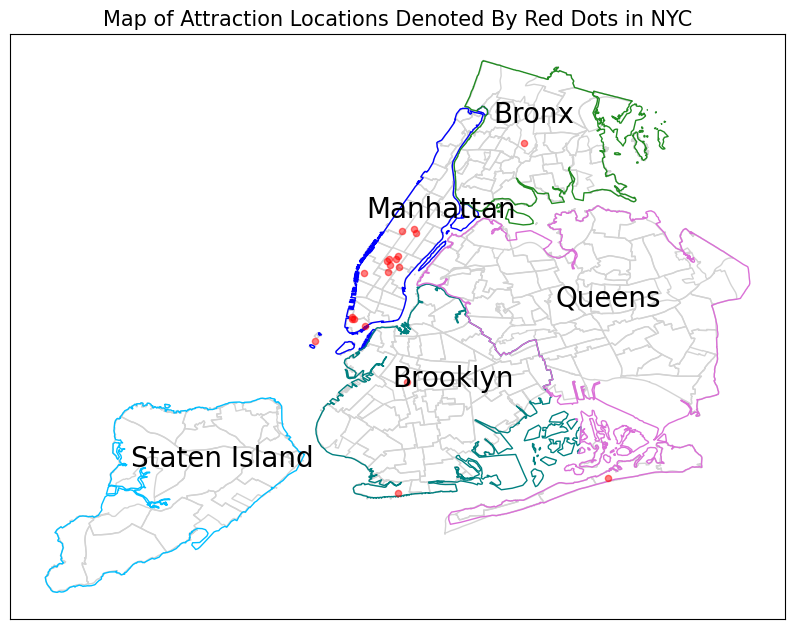

In [767]:
fig, gax = plt.subplots(figsize = (10,15))

tourism["Coordinate"] = list(zip(tourism.longitude, tourism.latitude))
tourism["Coordinates"] = tourism["Coordinate"].apply(Point)
gdf = gpd.GeoDataFrame(tourism, geometry="Coordinates")

# Plotting

nyc5.plot(ax = gax, edgecolor = "lightgrey", color = "None") #range of your column value for the color legend

for i in [("Manhattan","blue"),("Bronx","forestgreen"), ("Brooklyn","Teal"), 
          ("Queens","orchid"), ("Staten Island","deepskyblue")]:
    newyork_df.query("bname == '{}'".format(i[0])).plot(ax = gax, edgecolor = i[1], color = "None")
    
gdf.plot(ax = gax, color='red', alpha = 0.5, markersize = 20)
    
# Aesthetics
for a, b, label in zip(newyork_df['center'].x, newyork_df['center'].y, newyork_df['bname']):
    gax.annotate(label, xy=(a - 0.04,b + 0.01), xytext=(4,4), textcoords='offset points', fontsize=20, color = "Black")

gax.set_title("Map of Attraction Locations Denoted By Red Dots in NYC", fontsize = 15)

plt.tick_params(bottom = False,      
    top = False,
    left = False,
    labelbottom=False,
    labelleft=False)

The Simple/Empty Map above just shows the locations of the most visited places in New York City. From the Map we can see that each Borough except the Staten Islands has an attraction which garners more than 2 million tourists in a year. We can also see that majority of the tourist locations are found in the borough of Manhatten.

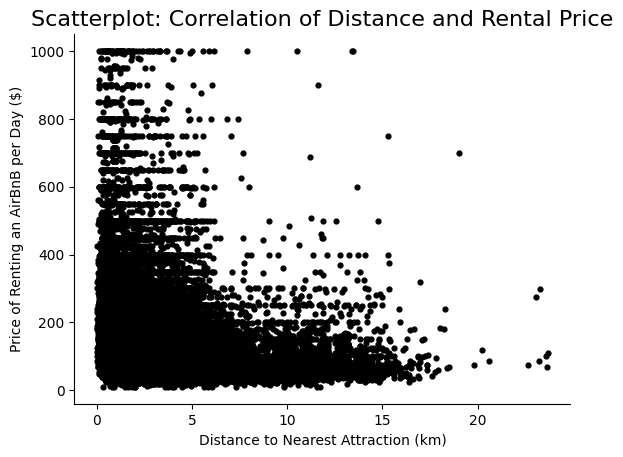

In [747]:
fig, ax = plt.subplots()

final_df.plot(kind="scatter", x="Distance to Closest Attraction", y="price", ax=ax, color= "black", s = 12)
for side in ["right", "top"]:
    ax.spines[side].set_visible(False)
ax.set_ylabel("Price of Renting an AirBnB per Day ($)")
ax.set_xlabel("Distance to Nearest Attraction (km)")
plt.title('Scatterplot: Correlation of Distance and Rental Price', fontsize = 16);

From the Scatter plot shown above we can get a sense of how the data is being distributed. We can see that so far our hypothesis holds, since there is a drop in listings the further you go away from attractions. We can also see a slow dip in the observed reantal prices in from above and distance increases. This shows a negative correlation between the price of renting an AirBnB per day and the distance to the nearest attraction.

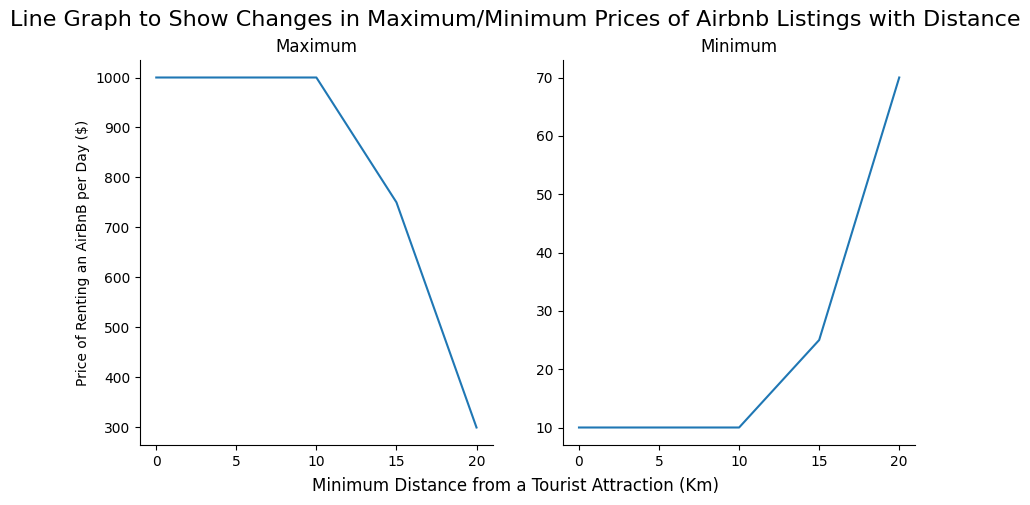

In [699]:
fig, ax = plt.subplots(1,2, sharex=True, figsize=(10,5))

graph = final_df.copy()
col = graph["Distance to Closest Attraction"]
graph["Distance Rounded"] = col.round(0)
graph.loc[col <= 25, "Distance Grouped"] = 20
graph.loc[col <= 20, "Distance Grouped"] = 15
graph.loc[col <= 15, "Distance Grouped"] = 10
graph.loc[col <= 10, "Distance Grouped"] = 5
graph.loc[col <= 5, "Distance Grouped"] = 0
grouped_graph = graph.groupby("Distance Grouped")[["price"]]

graph = grouped_graph.max()
graph.plot(ax = ax[0], legend=False, linestyle="solid")

graph2 = grouped_graph.min()
graph2.plot(ax = ax[1], legend=False, linestyle="solid")

for side in ["right", "top"]:
    ax[0].spines[side].set_visible(False)
    ax[1].spines[side].set_visible(False)

ax[0].set_ylabel("Price of Renting an AirBnB per Day ($)")
for i in range(2):
    ax[i].set_xlabel("")
ax[1].set_title("Minimum")
ax[0].set_title("Maximum")

fig.supxlabel("Minimum Distance from a Tourist Attraction (Km)")
fig.suptitle('Line Graph to Show Changes in Maximum/Minimum Prices of Airbnb Listings with Distance', fontsize = 16);

The scatter plot above shows all the observations collected, but we can analyse the trend of the Airbnb rental prices using a line graph. From the line graph above we clearly see that as the distance from the nearest tourist attractions increase, the maximum observation of a rental price drops sharpley after 10 kilometers. What is surprising is that when we measure the relationship distance to the minimum observable rental price, we see that there is an increase in the minimum price as the distance from attractions increase. What this shows is that whilst there are many higher priced Airbnb locations the closer the listing are to attractions, there are also more affordable listings. Assuming that listors did not make any errors in the entry of the price, this shows a supply of affordable housings even in expensive areas. This can help explain why places like Staten islands have on average higher rental prices than places like Queens and Bronx.

## Conclusion

In conclusion we can see that the correlation between the chosen variables and the price variable are close to zero. Even after cleaning the data set, there existed many other outliers in the "price" variable but since price can be chosen by each individual, we chose to only remove extreme outliers (greater than $1000) which would have affected the visualisation and analysis of the project. One interesting takeaway is the correlation between the "distance from Times Square" and the "Price" variable. We can see that the assumptions from the monocentric model fails as the rental prices seem to increase after 15 kilometers from the supposed city centre. Well we know that the monocentric model is model, however, is used mostly to study the formation of early cities and is not realistic to the more modern-like and complex metros we have today. Take for example the city of Toronto which contains more than one city centre within its boundaries. Further exploring this issue in Project part 3, we can see that there is a change/decrease in the maximum rental price charged as we move further away from the touristic parts of the boroughs. This however does not mean that prices of rentals in high toursim areas are all higher than the areas with low toursim as we found evidence that there is also a supply of affordable housing costs less than in low tourism areas. Assuming that these observations are not measurement errors, we can see that the prices of Airbnb vaires more in places with higher tourism than low tourism. 

From the maps in Project 2 we can see that there seem to be a lack of observations of listings as we move away from these listings. This reduction in listings means that listings with higher prices have a larger weight on the average Airbnb price in that neighbourhood. But why do listings decrease as we move away from Times Square? This can be because there is less incentives of listing homes on Airbnb provided that it is not in tourist locations like Manhatten. Listings which are found away from tourist locations are more likely to be higher in price as there seem to be a luxury component associated with the listing as producers adapt to the demand preferences of consumers. We can say that people are less likely to demand temporary housing away from high tourist destinations so producers must find a different way of incentivising their product inorder to make profit.

In combining our listings with crime data we can see that the prices of Listing does not depend on the level of burglaries in that area. From our maps generated we can see that although listings found in Manhatten are associated with higher burglaries in that area, the prices still remain high. From what we can say about this is that in these locations, consumers are less likely to care about the higher prices and high level of burglaries over the benefits that come from being in the City. Perhaps comparing Airbnb listing prices to level of burglaries is not a viable option and other types of crimes should be considered later on in the project. Lastly we can see that users which provide more than 2 listings in Airbnb are most likely listing their homes in locations like Manhatten and North Brooklyn rather than in less population dense areas like Staten Islands. This is probably because areas like Manhatten are more profitable due to the association with temporary housing and tourism.

Scraping data from the internet we were able to find and combine our current data with the median household income across different neighbourhoods in New York City. In analysing the relationship between income and rental prices, we do see an increase in the rental price in areas where there are higher income people and a decrease in rental prices in areas with lower income people. This however, does not entirely explain the relation behind why prices are high, but does seem to present a case where neighbourhoods with higher median household income demand higher rents. But we also see that in these same high income neighbourhoods there, are supplies of affordable housing which decreases the overall average cost. Where as locations where there less tourism have lower maximum prices charged but also higher minimun costs which raises the average costs of housing.
